## USAGERS

<label>Tasks</label>
<ul>
    <input type="checkbox"> Task 1 : Gérer les valeurs -1 et 0 pour le champ 'Place' <br>
    <input type="checkbox"> Task 2 : Gérer les valeurs 4 pour le champ 'Catu' : considéré comme des NAN <br>
    <input type="checkbox"> Task 3 : Les catégories non renseignées (-1 et 0) du champ 'Trajet' doivent-elles être regroupées ?<br>
    <input type="checkbox"> Task 4 : Préciser définition des champs : secu, secu1, secu2, secu3 <br>
</ul>

In [1]:
#(1) Import des packages
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import missingno as msno

In [2]:
import datetime as dt

In [3]:
usag = pd.read_csv('usagers.csv', low_memory=False)
#pd.read_csv(io.BytesIO(uploaded["usagers (3).csv"]), error_bad_lines=False, sep=',', encoding='latin-1')
usag.head(10)

,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,annee,id_vehicule,secu1,secu2,secu3
0,1,2.005000e+11,1.0,1,4,1,1.0,11.0,0.0,0,0.0,1976.0,A01,2005,NaN,NaN,NaN,NaN
1,2,2.005000e+11,1.0,1,3,2,3.0,11.0,0.0,0,0.0,1968.0,B02,2005,NaN,NaN,NaN,NaN
2,3,2.005000e+11,2.0,2,1,1,0.0,11.0,0.0,0,0.0,1964.0,B02,2005,NaN,NaN,NaN,NaN
3,4,2.005000e+11,4.0,2,1,1,0.0,31.0,0.0,0,0.0,2004.0,B02,2005,NaN,NaN,NaN,NaN
4,5,2.005000e+11,5.0,2,1,1,0.0,11.0,0.0,0,0.0,1998.0,B02,2005,NaN,NaN,NaN,NaN
5,6,2.005000e+11,3.0,2,1,2,0.0,11.0,0.0,0,0.0,1991.0,B02,2005,NaN,NaN,NaN,NaN
6,7,2.005000e+11,1.0,1,1,1,5.0,11.0,0.0,0,0.0,1955.0,A01,2005,NaN,NaN,NaN,NaN
7,8,2.005000e+11,1.0,1,3,1,5.0,21.0,0.0,0,0.0,1979.0,B02,2005,NaN,NaN,NaN,NaN
8,9,2.005000e+11,1.0,1,1,1,1.0,21.0,0.0,0,0.0,1983.0,A01,2005,NaN,NaN,NaN,NaN
9,10,2.005000e+11,1.0,1,3,1,1.0,21.0,0.0,0,0.0,1956.0,B02,2005,NaN,NaN,NaN,NaN


In [4]:
usag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509620 entries, 0 to 2509619
Data columns (total 18 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   num_acc      float64
 2   place        float64
 3   catu         int64  
 4   grav         int64  
 5   sexe         int64  
 6   trajet       float64
 7   secu         float64
 8   locp         float64
 9   actp         object 
 10  etatp        float64
 11  an_nais      float64
 12  num_veh      object 
 13  annee        int64  
 14  id_vehicule  object 
 15  secu1        float64
 16  secu2        float64
 17  secu3        float64
dtypes: float64(10), int64(5), object(3)
memory usage: 344.6+ MB


In [5]:
usag.describe()

,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,secu,locp,etatp,an_nais,annee,secu1,secu2,secu3
count,2.509620e+06,2.509620e+06,2.386492e+06,2.509620e+06,2.509620e+06,2.509620e+06,2.509126e+06,2.085658e+06,2.453259e+06,2.453202e+06,2.504135e+06,2.509620e+06,367425.000000,367425.000000,367425.000000
mean,1.254810e+06,2.012251e+11,1.426311e+00,1.341396e+00,2.516410e+00,1.323586e+00,3.139610e+00,1.796288e+01,1.660656e-01,-3.379339e-02,1.974626e+03,2.012250e+03,1.979582,1.216251,-0.915591
std,7.244650e+05,4.959433e+08,1.384951e+00,6.311903e-01,1.340452e+00,4.756037e-01,2.686715e+00,1.929059e+01,9.543100e-01,5.428035e-01,1.880168e+01,4.959536e+00,2.339288,3.178031,0.887917
min,1.000000e+00,2.005000e+11,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.896000e+03,2.005000e+03,-1.000000,-1.000000,-1.000000
25%,6.274058e+05,2.008000e+11,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.962000e+03,2.008000e+03,1.000000,-1.000000,-1.000000
50%,1.254810e+06,2.012000e+11,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.978000e+03,2.012000e+03,1.000000,0.000000,-1.000000
75%,1.882215e+06,2.017000e+11,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,1.989000e+03,2.017000e+03,2.000000,0.000000,-1.000000
max,2.509620e+06,2.021001e+11,1.000000e+01,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,9.300000e+01,9.000000e+00,3.000000e+00,2.021000e+03,2.021000e+03,9.000000,9.000000,9.000000


In [6]:
# Nombre de valeurs NaN (manquantes) dans chaque colonne :
usag.isna().sum().sort_values()

Unnamed: 0           0
num_acc              0
annee                0
catu                 0
grav                 0
sexe                 0
num_veh              0
trajet             494
an_nais           5485
locp             56361
etatp            56418
actp             56462
place           123128
secu            423962
secu2          2142195
id_vehicule    2142195
secu1          2142195
secu3          2142195
dtype: int64

In [7]:
# Calcul pourcentage de NaN par colonne
pourcentage_nan = usag.isna().mean() * 100
print(pourcentage_nan.sort_values().round(2))

Unnamed: 0      0.00
num_acc         0.00
annee           0.00
catu            0.00
grav            0.00
sexe            0.00
num_veh         0.00
trajet          0.02
an_nais         0.22
locp            2.25
etatp           2.25
actp            2.25
place           4.91
secu           16.89
secu2          85.36
id_vehicule    85.36
secu1          85.36
secu3          85.36
dtype: float64


In [8]:
# Vérification qu'il n'y est pas des lignes en doublon :
usag.duplicated().sum()

0

==> Aucune ligne en doublon

In [9]:
# Identification de la liste des valeurs pour la colonne "num_acc":
#unique_values = usag['num_acc'].unique()
#print(unique_values)

num_acc = Identifiant de l’accident.

In [10]:
# Identification du nbre valeurs différentes pour la colonne "num_acc":
unique_values_number = usag['num_acc'].nunique()
print(unique_values_number)

983913


num_veh = Identifiant du véhicule repris pour chacun des usagers occupant ce véhicule (y compris les piétons qui sont rattachés aux véhicules qui les ont heurtés) – Code alphanumérique

In [11]:
# Renvoie du type d'objets de la colonne num_veh
usag.num_veh.dtypes

dtype('O')

In [12]:
# Identification de la liste des valeurs pour la colonne "num_veh":
unique_values = usag['num_veh'].unique()
print(unique_values)

['A01' 'B02' 'C03' 'D04' 'E05' 'F06' 'G07' 'H08' 'I09' 'K11' 'J10' 'B01'
 'C01' 'D01' 'E01' 'F01' 'G01' 'H01' 'I01' 'O01' 'M01' 'P01' 'L12' 'A03'
 'X01' 'V01' 'A02' 'N01' 'P16' 'N14' 'M13' 'O15' 'W01' 'J01' 'Q17' 'R18'
 'S19' 'T20' 'U21' 'V22' 'W23' 'X24' 'Y25' 'Z26' 'A27' 'B28' 'C29' 'D30'
 'E31' 'F32' 'G33' 'H34' 'I35' 'J36' 'K37' 'L38' 'M39' 'N40' 'O41' 'P42'
 'Q43' 'R44' 'C02' 'K01' 'T01' 'S45' 'T46' 'U47' 'V48' 'W49' 'X50' 'Y51'
 'Z52' 'A53' 'B54' 'C55' 'D56' 'I02' 'H02' 'G02' 'F02' 'E02' 'Z01' 'D03'
 'Z02' 'D02' 'U01' 'D05' 'E04' 'Y01' 'L03' 'K03' 'J02' 'J03' 'L02' 'F04'
 'G04' 'B03' 'A05' 'A04' 'L01' 'C04' 'B04' 'E03' 'K02' 'S01' 'A09' 'C06'
 'C05' 'B06' 'A08' 'B09' 'C08' 'B07' 'Q01' 'A06' 'C07' 'R01' 'C09' 'A07'
 'B08' 'B05' 'O03' 'M03' 'N03' 'F05' 'G06' 'H07' 'I08' 'Z03' 'LB01' 'MA01'
 'CB01' '\\01' 'VF01' 'LA01' 'AA01' 'NA01' 'SA01' 'CA01' 'BA01' 'AB01'
 'PA01' 'EB01' 'WB01' 'RA01' 'MV01' 'EA01' 'TB01' 'AY01' 'SB01' 'HB01'
 'FA01' 'BB01' 'VB01' 'GA01' 'MB01' 'PB01' '[01' 'IB0

In [13]:
len(unique_values)

173

In [14]:
# Identification du nbre de valeurs différentes pour la colonne "num_veh":
unique_values_number = usag['num_veh'].nunique()
print(unique_values_number)

173


annee

In [15]:
# Renvoie du type d'objets de la colonne annee
usag.annee.dtypes

dtype('int64')

In [16]:
# Liste des valeurs uniques
usag.annee.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

In [17]:
# Conversion au format "date"
usag.annee = pd.to_datetime(usag.annee, format='%Y')

In [18]:
# Distribution de la variable "annee"
distribution = usag['annee'].describe()
print(distribution)

count                 2509620
unique                     17
top       2005-01-01 00:00:00
freq                   197498
first     2005-01-01 00:00:00
last      2021-01-01 00:00:00
Name: annee, dtype: object


/var/folders/g0/g76qn8pj0j10kx_v9q9r022w0000gn/T/ipykernel_32157/3591359252.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  distribution = usag['annee'].describe()


In [19]:
type(usag['annee'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
usag['annee'][0].strftime('%Y')

'2005'

In [21]:
usag.annee = usag.annee.apply(lambda date: date.strftime('%Y'))
display(usag.annee.head())
display(usag.annee.tail())

0    2005
1    2005
2    2005
3    2005
4    2005
Name: annee, dtype: object

2509615    2021
2509616    2021
2509617    2021
2509618    2021
2509619    2021
Name: annee, dtype: object

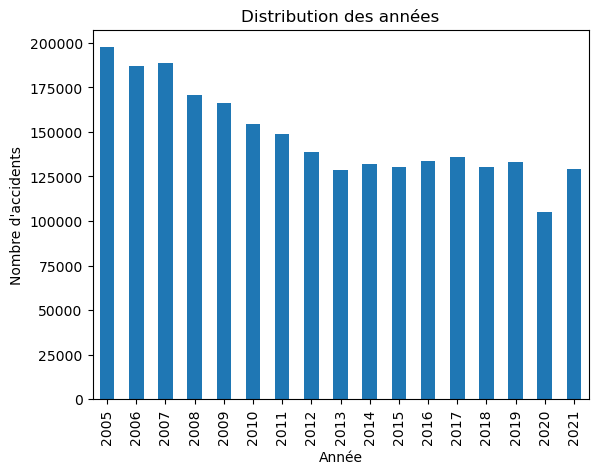

In [22]:
# Le nbre d'accidents par chaque année
counts = usag['annee'].value_counts()

# Tri par année
counts = counts.sort_index()

# Distribution des années sous forme de graphe
counts.plot(kind='bar')

plt.title('Distribution des années')
plt.xlabel('Année')
plt.ylabel("Nombre d'accidents")

plt.show();

**Place**

Permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident. 
La place dépends du type de véhicule : moto/side car, voiture ou transport en commun
Le détail est donné par l’illustration ci-dessous :

In [23]:
# Renvoie du type d'objets de la colonne place
usag.place.dtypes

dtype('float64')

In [24]:
usag.place.unique()

array([ 1.,  2.,  4.,  5.,  3.,  0.,  8.,  9.,  7.,  6., nan, 10., -1.])

In [25]:
# Convert situ from float to category
usag.place = usag.place.astype('category')
# Write an assert statement confirming the change
assert usag.place.dtype == 'category'

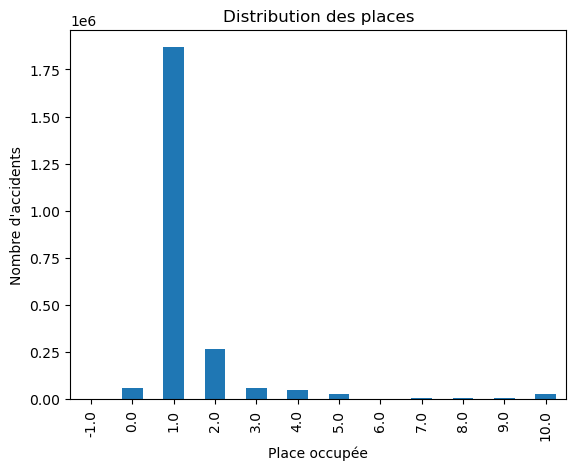

In [26]:
# Le nbre d'accidents par place occupée par l'usager
counts = usag['place'].value_counts()

# Tri par place occupée
counts = counts.sort_index()

# Distribution des places occupées sous forme de graphe
counts.plot(kind='bar')

plt.title('Distribution des places')
plt.xlabel('Place occupée')
plt.ylabel("Nombre d'accidents")

plt.show()

<div class="alert alert-warning">Il semble intéressant d'analyser la place en fonction de la catégorie du véhicule : catv .</div>

**Catu** 

Catégorie d'usager :
 - 1 – Conducteur
 - 2 – Passager
 - 3 – Piéton

In [27]:
# Renvoie du type d'objets de la colonne catu
usag.catu.dtypes

dtype('int64')

In [28]:
usag.catu.unique()

array([1, 2, 3, 4])

In [29]:
# Convert catu from int to category
usag.catu = usag.catu.astype('category')
# Write an assert statement confirming the change
assert usag.catu.dtype == 'category'

In [30]:
usag.value_counts("catu")

catu
1    1867065
2     431895
3     207100
4       3560
dtype: int64

In [31]:
# Replace catagory number by category names
usag.catu.replace([1, 2, 3], 
                  ['Conducteur', 'Passager', 'Piéton'],
                 inplace=True)

In [32]:
usag.value_counts("catu")

catu
Conducteur    1867065
Passager       431895
Piéton         207100
4                3560
dtype: int64

In [168]:
usag.catu.replace([4], [np.nan], inplace=True)

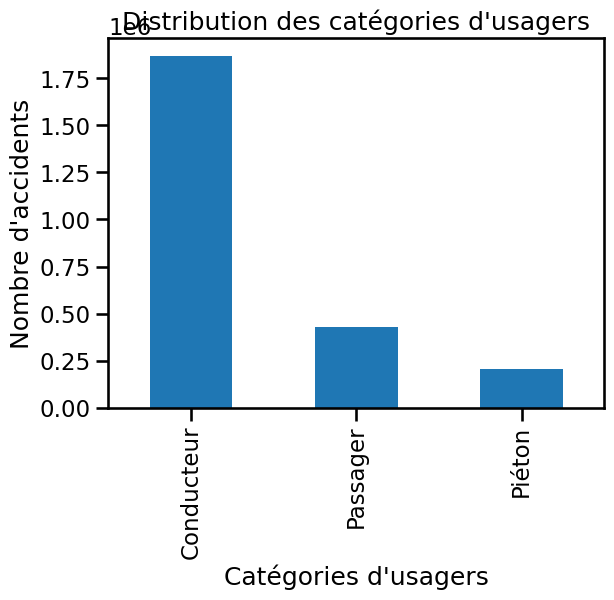

In [169]:
# Le nbre d'accidents par catégorie d'usager
counts = usag['catu'].value_counts()

# Tri par catégorie d'usager
counts = counts.sort_index()

# Distribution des catégories d'usager sous forme de graphe
counts.plot(kind='bar')

# Set text labels and properties.
#plt.xticks([1, 2, 3, 4], ['Conducteur(1)', 'Passager(2)', 'Piéton(3)', '4'])  
plt.title("Distribution des catégories d'usagers")
plt.xlabel("Catégories d'usagers")
plt.ylabel("Nombre d'accidents")

plt.show()

**grav**

Gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de victimes plus les indemnes :
 - 1 – Indemne
 - 2 – Tué
 - 3 – Blessé hospitalisé
 - 4 – Blessé léger

In [34]:
# Renvoie du type d'objets de la colonne grav
display(usag.grav.dtypes)
display(usag.grav.unique())

dtype('int64')

array([ 4,  3,  1,  2, -1])

In [35]:
# Convert grav from int to category
usag.grav = usag.grav.astype('category')
# Write an assert statement confirming the change
assert usag.grav.dtype == 'category'

In [36]:
# Replace catagory number by category names
usag.grav.replace([1, 2, 3, 4], 
                  ['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger'],
                 inplace=True)

In [37]:
usag.value_counts("grav", dropna=False, normalize=True)*100

grav
Indemne               41.005451
Blessé léger          36.334266
Blessé hospitalisé    19.985057
Tué                    2.672835
-1                     0.002391
dtype: float64

In [38]:
usag['grav'].cat.categories

Index([-1, 'Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger'], dtype='object')

In [39]:
usag['grav'] = usag['grav'].cat.reorder_categories(
  new_categories=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué', -1], 
  ordered=True
)

In [40]:
usag['grav'].cat.categories

Index(['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué', -1], dtype='object')

In [41]:
usag.value_counts("grav")

grav
Indemne               1029081
Blessé léger           911852
Blessé hospitalisé     501549
Tué                     67078
-1                         60
dtype: int64

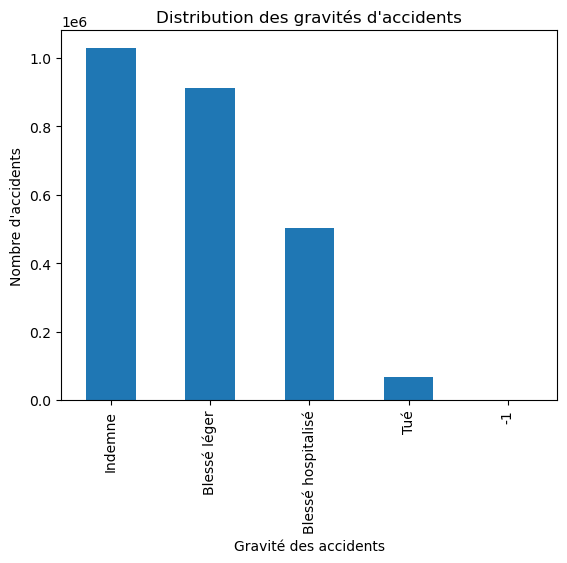

In [42]:
# Le nbre d'accidents par niveau de gravité
counts = usag['grav'].value_counts()

# Tri par gravité d'accident
counts = counts.sort_index()

#plt.figure(figsize=(9, 9))
# Distribution des gravités d'accident sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution des gravités d'accidents")
plt.xlabel("Gravité des accidents")
plt.ylabel("Nombre d'accidents")

plt.show()

**sexe**

Sexe de l'usager :
 - 1 – Masculin
 - 2 – Féminin

In [43]:
# Renvoie du type d'objets de la colonne sexe
usag.sexe.dtypes

dtype('int64')

In [44]:
# Convert sexe from int to category
usag.sexe = usag.sexe.astype('category')
# Write an assert statement confirming the change
assert usag.sexe.dtype == 'category'

In [45]:
# Renvoie les valeurs uniques
display(usag.sexe.unique())

[1, 2, -1]
Categories (3, int64): [-1, 1, 2]

In [46]:
# Replace catagory number by category names
usag['sexe']= usag.sexe.replace([1, 2, -1], ['Masculin', 'Féminin', 'Non renseigné'])

In [47]:
usag.value_counts("sexe")

sexe
Masculin         1688356
Féminin           818202
Non renseigné       3062
dtype: int64

In [48]:
usag.value_counts("sexe", dropna=False, normalize=True).round(2)*100

sexe
Masculin         67.0
Féminin          33.0
Non renseigné     0.0
dtype: float64

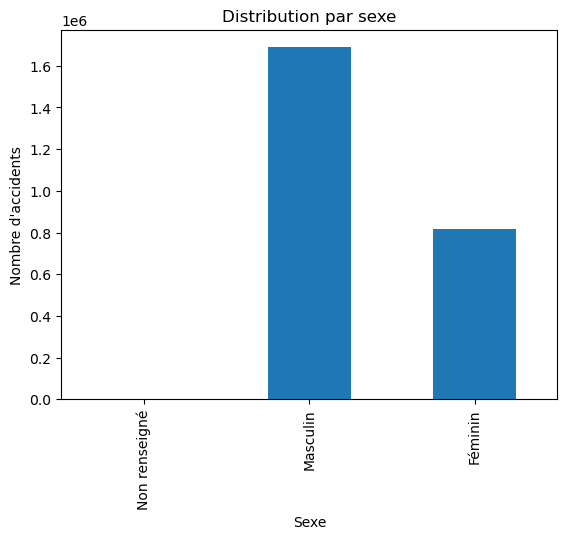

In [49]:
# Le nbre d'accidents par sexe
counts = usag['sexe'].value_counts()

# Tri par sexe
counts = counts.sort_index()

# Distribution des sexes sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'accidents")

plt.show()

**trajet**

Motif du déplacement au moment de l’accident :

 - -1 – Non renseigné
 - 0 – Non renseigné
 - 1 – Domicile – travail
 - 2 – Domicile – école
 - 3 – Courses – achats
 - 4 – Utilisation professionnelle
 - 5 – Promenade – loisirs
 - 9 – Autre

In [50]:
# Renvoie du type d'objets de la colonne trajet
display(usag.trajet.dtypes)
display(usag.trajet.unique())

dtype('float64')

array([ 1.,  3.,  0.,  5.,  9.,  4.,  2., nan, -1.])

In [51]:
# Convert trajet from float to category
usag.trajet = usag.trajet.astype('category')
# Write an assert statement confirming the change
assert usag.trajet.dtype == 'category'

In [52]:
usag.value_counts("trajet")

trajet
5.0     932128
0.0     701979
1.0     328622
4.0     244128
9.0     178874
3.0      67326
2.0      52043
-1.0      4026
dtype: int64

In [53]:
# Task 3: Les catégories non renseignées (-1 et 0) doivent-elles être regroupées ?

In [54]:
# Replace catagory number by category names
usag['trajet'] = usag.trajet.replace([-1, 0, 1, 2, 3, 4, 5, 9], 
                    ['Non renseigné', 'Non renseigné', 'Domicile – travail', 'Domicile – école', 
                     'Courses – achats', 'Utilisation professionnelle', 'Promenade – loisirs', 
                     'Autre'])

In [55]:
usag.value_counts("trajet", dropna=False, normalize=True)*100

trajet
Promenade – loisirs            37.149509
Non renseigné                  28.137487
Domicile – travail             13.097070
Utilisation professionnelle     9.729603
Autre                           7.128937
Courses – achats                2.683245
Domicile – école                2.074149
dtype: float64

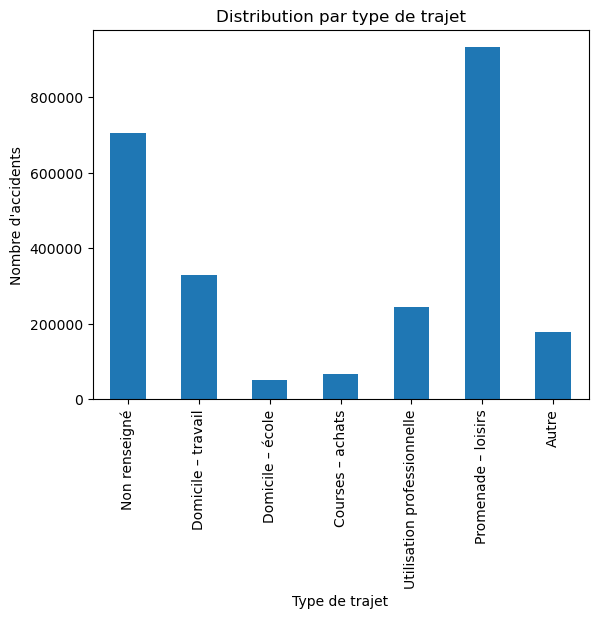

In [56]:
# Le nbre d'accidents par trajet
counts = usag['trajet'].value_counts()

# Tri par trajet
counts = counts.sort_index()

# Distribution des types de trajet sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par type de trajet")
plt.xlabel("Type de trajet")
plt.ylabel("Nombre d'accidents")

plt.show()

<div class="alert alert-info">Les équipements de sécurité jusqu’en 2018 étaient en 2 variables : existence et utilisation.
A partir de 2019, il s’agit de l’utilisation avec jusqu’à 3 équipements possibles pour un même usager
(notamment pour les motocyclistes dont le port du casque et des gants est obligatoire).</div>

In [57]:
# Task 4 : Préciser définition des champs : secu, secu1, secu2, secu3

In [58]:
# Renvoie du type d'objets de la colonne trajet
display(usag.secu.dtypes)
display(usag.secu.unique())

dtype('float64')

array([11., 31., 21.,  0., 12., 13., 90., 10., 22., 91., 33., 41., 23.,
       20., 92., 32., 43., 93., 42.,  1., nan, 30., 40.,  3.,  2.])

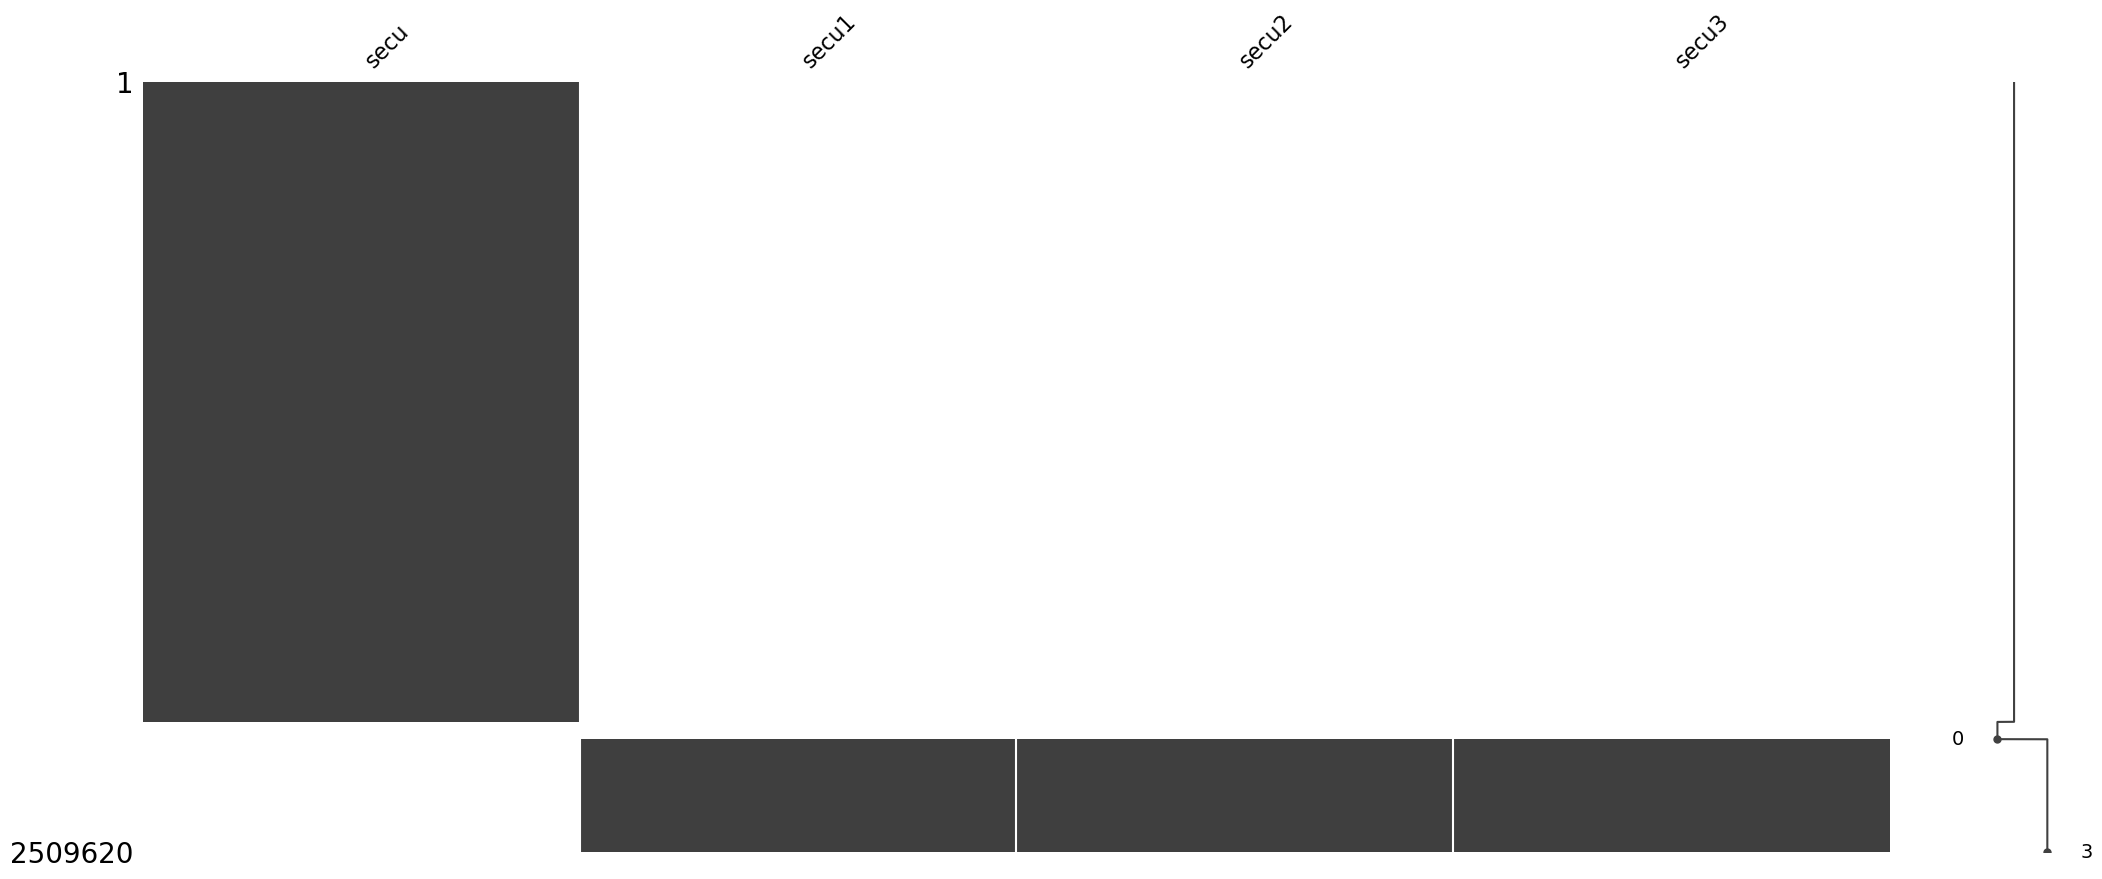

In [59]:
## Plot nullity matrix of lieux sorted by column 'secu' values
fig = msno.matrix(usag[['secu', 'secu1', 'secu2', 'secu3']].sort_values("secu"))

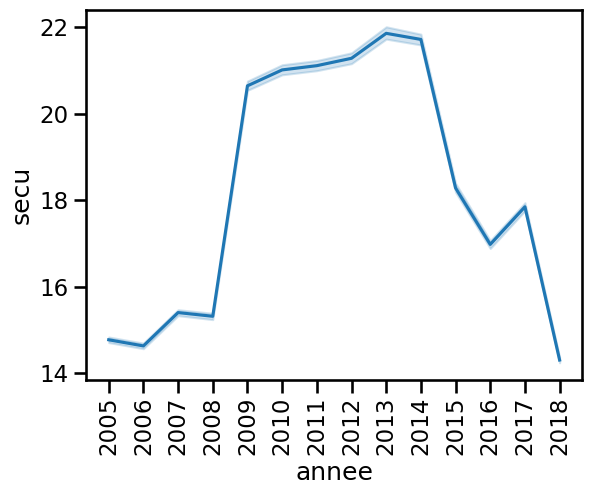

In [60]:
sns.set_context("talk")
sns.lineplot(data=usag, x="annee", y="secu")
plt.xticks(rotation='vertical');

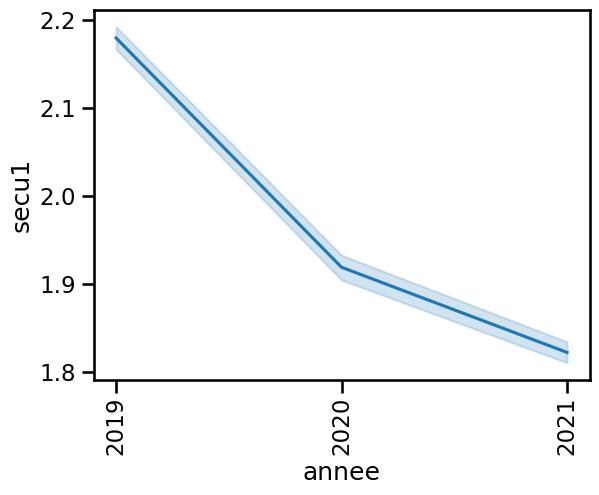

In [61]:
sns.lineplot(data=usag, x="annee", y="secu1")
plt.xticks(rotation='vertical');

In [62]:
usag['secu'].astype(str).str[0]

0          1
1          1
2          1
3          3
4          1
          ..
2509615    n
2509616    n
2509617    n
2509618    n
2509619    n
Name: secu, Length: 2509620, dtype: object

In [63]:
usag['secu'].astype(str).str[1].head()

0    1
1    1
2    1
3    1
4    1
Name: secu, dtype: object

In [64]:
(usag['secu'].isna().sum()/len(usag)).round(2)

0.17

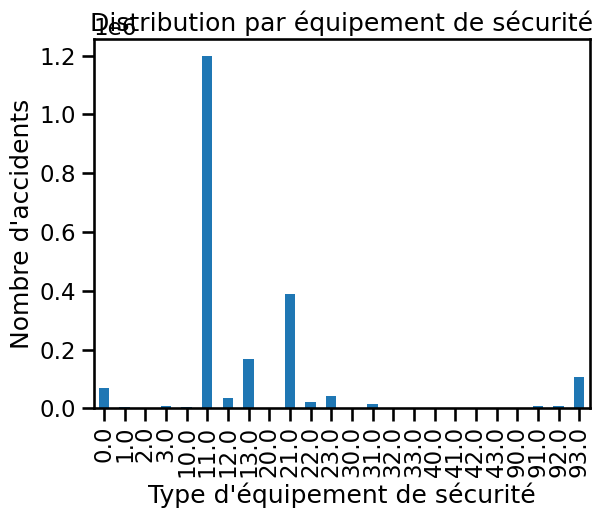

In [65]:
# Le nbre d'accidents par équipements de sécurité utilisés
counts = usag['secu'].value_counts()

# Tri par équipement de sécurité
counts = counts.sort_index()

# Distribution des équipements de sécurité sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par équipement de sécurité")
plt.xlabel("Type d'équipement de sécurité")
plt.ylabel("Nombre d'accidents")

plt.show()

In [66]:
# Liste des valeurs pour la colonne "secu" :
unique_values = usag['secu'].unique()
print(unique_values)


[11. 31. 21.  0. 12. 13. 90. 10. 22. 91. 33. 41. 23. 20. 92. 32. 43. 93.
 42.  1. nan 30. 40.  3.  2.]


In [67]:
# Nbre de valeurs différentes pour la colonne "secu" :
unique_values_number = usag['secu'].nunique()
print(unique_values_number)

24


**secu1**

Le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité :
 - -1 – Non renseigné
 - 0 – Aucun équipement
 - 1 – Ceinture
 - 2 – Casque
 - 3 – Dispositif enfants
 - 4 – Gilet réfléchissant
 - 5 – Airbag (2RM/3RM)
 - 6 – Gants (2RM/3RM)
 - 7 – Gants + Airbag (2RM/3RM)
 - 8 – Non déterminable
 - 9 – Autre

In [68]:
# Renvoie du type d'objets de la colonne trajet
display(usag.secu1.dtypes)
display(usag.secu2.dtypes)
display(usag.secu3.dtypes)

dtype('float64')

dtype('float64')

dtype('float64')

In [69]:
# conversion tmporaire en STR
usag['secuUn'] = usag['secu1'].astype(str)
usag['secuDeux'] = usag['secu2'].astype(str)

In [70]:
# Renvoie du type d'objets de la colonne trajet
display(usag.secuUn.dtypes)
display(usag.secuDeux.dtypes)

dtype('O')

dtype('O')

In [71]:
usag['secu1'].unique()

array([nan,  1.,  2.,  8.,  0.,  3.,  4.,  5.,  6.,  9., -1.,  7.])

In [72]:
# Check if the value is not NA then do the conversion and subsetting. – 
# numpy.where(condition, [x, y, ]/) Where True, yield x, otherwise yield y.
np.where(usag["secu"].isna(), usag['secu1'].astype(str).str[0], usag['secu'].astype(str).str[0]) 

array(['1', '1', '1', ..., '0', '1', '1'], dtype=object)

In [73]:
usag['secuUn'] = np.where(usag["secu"].isna(), usag['secu1'].astype(str).str[0], usag['secu'].astype(str).str[0]) 

In [74]:
usag['secuUn'].head()

0    1
1    1
2    1
3    3
4    1
Name: secuUn, dtype: object

In [75]:
# Liste des valeurs pour la colonne "secuUn" :
usag['secuUn'].unique()

array(['1', '3', '2', '0', '9', '4', 'n', '8', '5', '6', '-', '7'],
      dtype=object)

In [76]:
# Liste des valeurs pour la colonne "secu1" :
usag['secu1'].unique()

array([nan,  1.,  2.,  8.,  0.,  3.,  4.,  5.,  6.,  9., -1.,  7.])

In [77]:
usag['secu'].astype(str).str[0].unique()

array(['1', '3', '2', '0', '9', '4', 'n'], dtype=object)

In [78]:
# Replace catagory number by category names
usag.secuUn.replace(['n', '-'], [np.nan, '-1'], inplace=True)

In [79]:
# Liste des valeurs pour la colonne "secu1" :
usag['secuUn'].unique()

array(['1', '3', '2', '0', '9', '4', nan, '8', '5', '6', '-1', '7'],
      dtype=object)

In [80]:
# Convert secu1 from float to category
usag.secuUn = usag.secuUn.astype('category')
# Write an assert statement confirming the change
assert usag.secuUn.dtype == 'category'

In [81]:
# Replace catagory number by category names
usag['secuUn'] = usag.secuUn.replace(['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
                   ['Non renseigné', 'Aucun équipement', 'Ceinture', 'Casque', 'Dispositif enfants',
                   'Gilet réfléchissant', 'Airbag (2RM/3RM)', 'Gants (2RM/3RM)', 
                    'Gants + Airbag (2RM/3RM)', 'Non déterminable', 'Autre'])

In [82]:
usag.value_counts("secuUn", dropna=False, normalize=True)*100

secuUn
Ceinture                    66.375170
Casque                      21.394140
Autre                        4.930938
Aucun équipement             3.969006
Non déterminable             1.833937
Dispositif enfants           1.087366
Gilet réfléchissant          0.270109
Non renseigné                0.118708
Gants (2RM/3RM)              0.012311
Airbag (2RM/3RM)             0.007908
Gants + Airbag (2RM/3RM)     0.000408
dtype: float64

In [83]:
# pourcentage de valeurs maquantes
(usag.secuUn.isna().sum()/len(usag)).round(2)

0.02

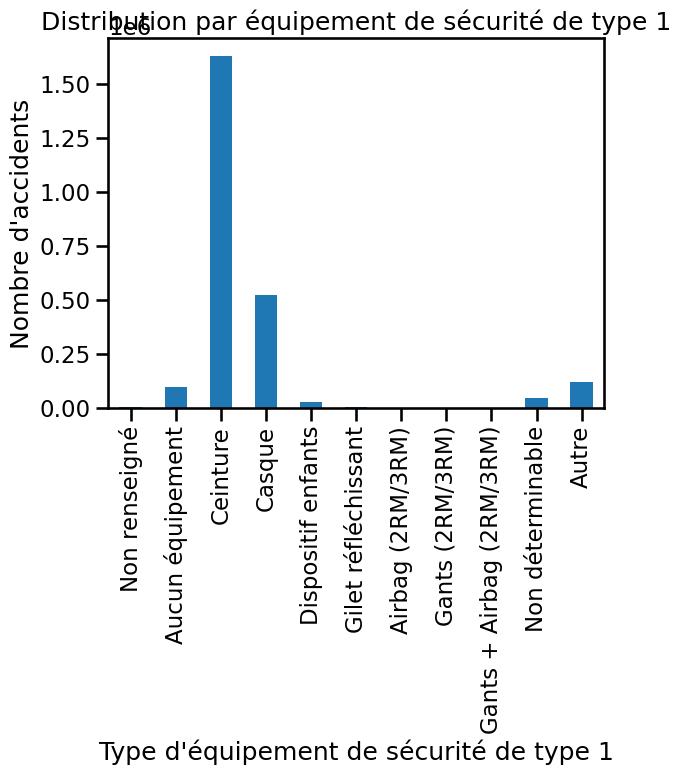

In [84]:
# Le nbre d'accidents par équipements de sécurité utilisés de type 1
counts = usag['secuUn'].value_counts()

# Tri par équipement de sécurité de type 1
counts = counts.sort_index()

# Distribution des équipements de sécurité de type 1 sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par équipement de sécurité de type 1")
plt.xlabel("Type d'équipement de sécurité de type 1")
plt.ylabel("Nombre d'accidents")

plt.show()

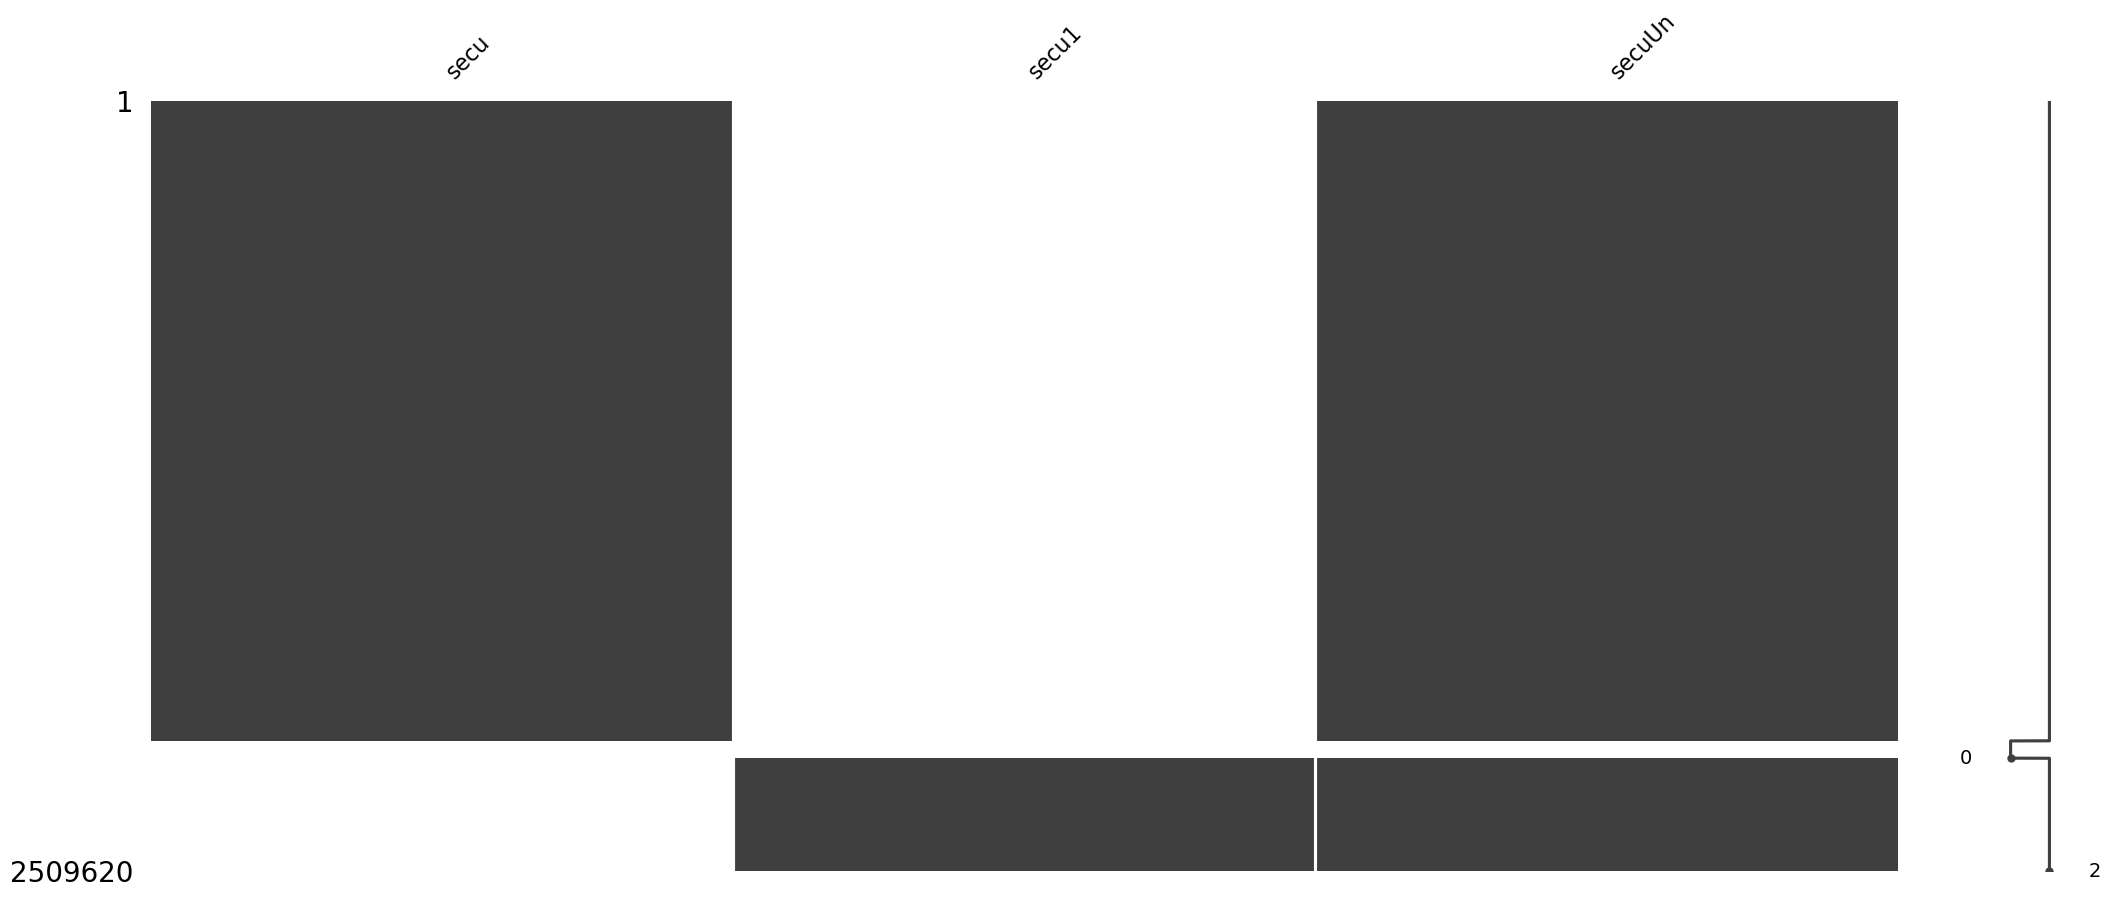

In [85]:
## Plot nullity matrix of lieux sorted by column 'secu' values
fig = msno.matrix(usag[['secu', 'secu1', 'secuUn']].sort_values("secu"))

**secu2**

Le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité :
 - -1 – Non renseigné
 - 0 – Aucun équipement
 - 1 – Ceinture
 - 2 – Casque
 - 3 – Dispositif enfants
 - 4 – Gilet réfléchissant
 - 5 – Airbag (2RM/3RM)
 - 6 – Gants (2RM/3RM)
 - 7 – Gants + Airbag (2RM/3RM)
 - 8 – Non déterminable
 - 9 – Autre

In [86]:
# Liste des valeurs pour la colonne "secu2" :
unique_values = usag['secu2'].unique()
print(unique_values)

[nan  0.  8.  6. -1.  7.  4.  9.  5.  2.  3.  1.]


In [87]:
usag['secu'].unique()

array([11., 31., 21.,  0., 12., 13., 90., 10., 22., 91., 33., 41., 23.,
       20., 92., 32., 43., 93., 42.,  1., nan, 30., 40.,  3.,  2.])

In [88]:
usag['secu'].astype(str).str[1].unique()

array(['1', '.', '2', '3', '0', 'a'], dtype=object)

In [89]:
np.where(usag["secu"].isna(), usag['secu2'].astype(str).str[0], usag['secu'].astype(str).str[1]) 

array(['1', '1', '1', ..., '-', '0', '0'], dtype=object)

In [90]:
usag['secuDeux'] = np.where(usag["secu"].isna(), usag['secu2'].astype(str).str[0], usag['secu'].astype(str).str[1]) 
usag['secuDeux'].head()

0    1
1    1
2    1
3    1
4    1
Name: secuDeux, dtype: object

In [91]:
# Liste des valeurs pour la colonne "secuDeux" :
usag['secuDeux'].unique()

array(['1', '.', '2', '3', '0', 'n', '8', '6', '-', '7', '4', '9', '5'],
      dtype=object)

In [92]:
# Replace catagory number by category names
usag.secuDeux.replace(['.', 'n', '-'], ['-1', np.nan, '-1'], inplace=True)

In [93]:
# Liste des valeurs pour la colonne "secuDeux" :
usag['secuDeux'].unique()

array(['1', '-1', '2', '3', '0', nan, '8', '6', '7', '4', '9', '5'],
      dtype=object)

In [94]:
# Convert secu2 from float to category
usag.secuDeux = usag.secuDeux.astype('category')
# Write an assert statement confirming the change
assert usag.secuDeux.dtype == 'category'

In [95]:
# Replace catagory number by category names
usag['secuDeux'] =  usag.secuDeux.replace(['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
                   ['Non renseigné', 'Aucun équipement', 'Ceinture', 'Casque', 'Dispositif enfants',
                   'Gilet réfléchissant(4)', 'Airbag (2RM/3RM)(5)', 'Gants (2RM/3RM)(6)', 
                    'Gants + Airbag (2RM/3RM)', 'Non déterminable', 'Autre'])

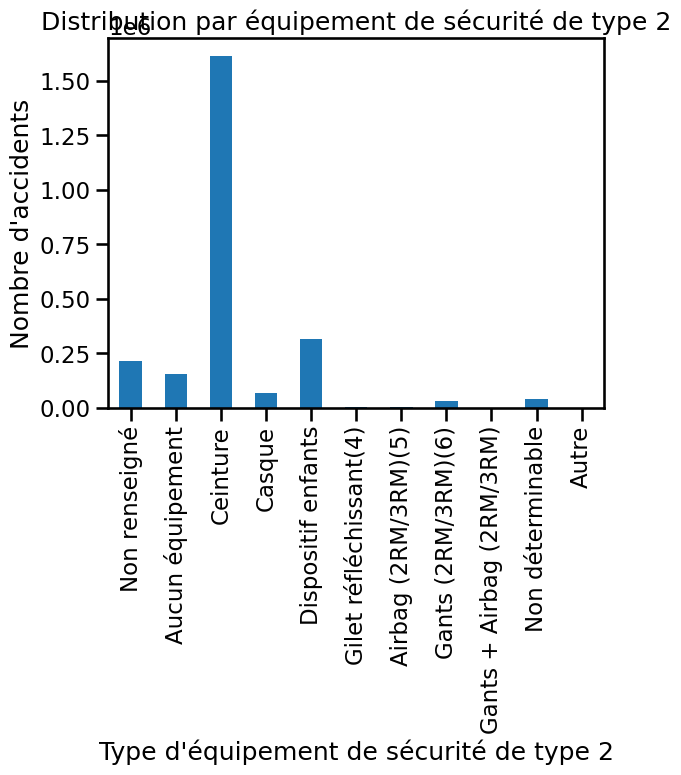

In [96]:
# Le nbre d'accidents par équipements de sécurité utilisés de type 2
counts = usag['secuDeux'].value_counts()

# Tri par équipement de sécurité de type 2
counts = counts.sort_index()

# Distribution des équipements de sécurité de type 2 sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par équipement de sécurité de type 2")
plt.xlabel("Type d'équipement de sécurité de type 2")
plt.ylabel("Nombre d'accidents")

plt.show()

In [97]:
# pourcentage de valeurs maquantes
(usag.secuDeux.isna().sum()/len(usag)).round(2)

0.02

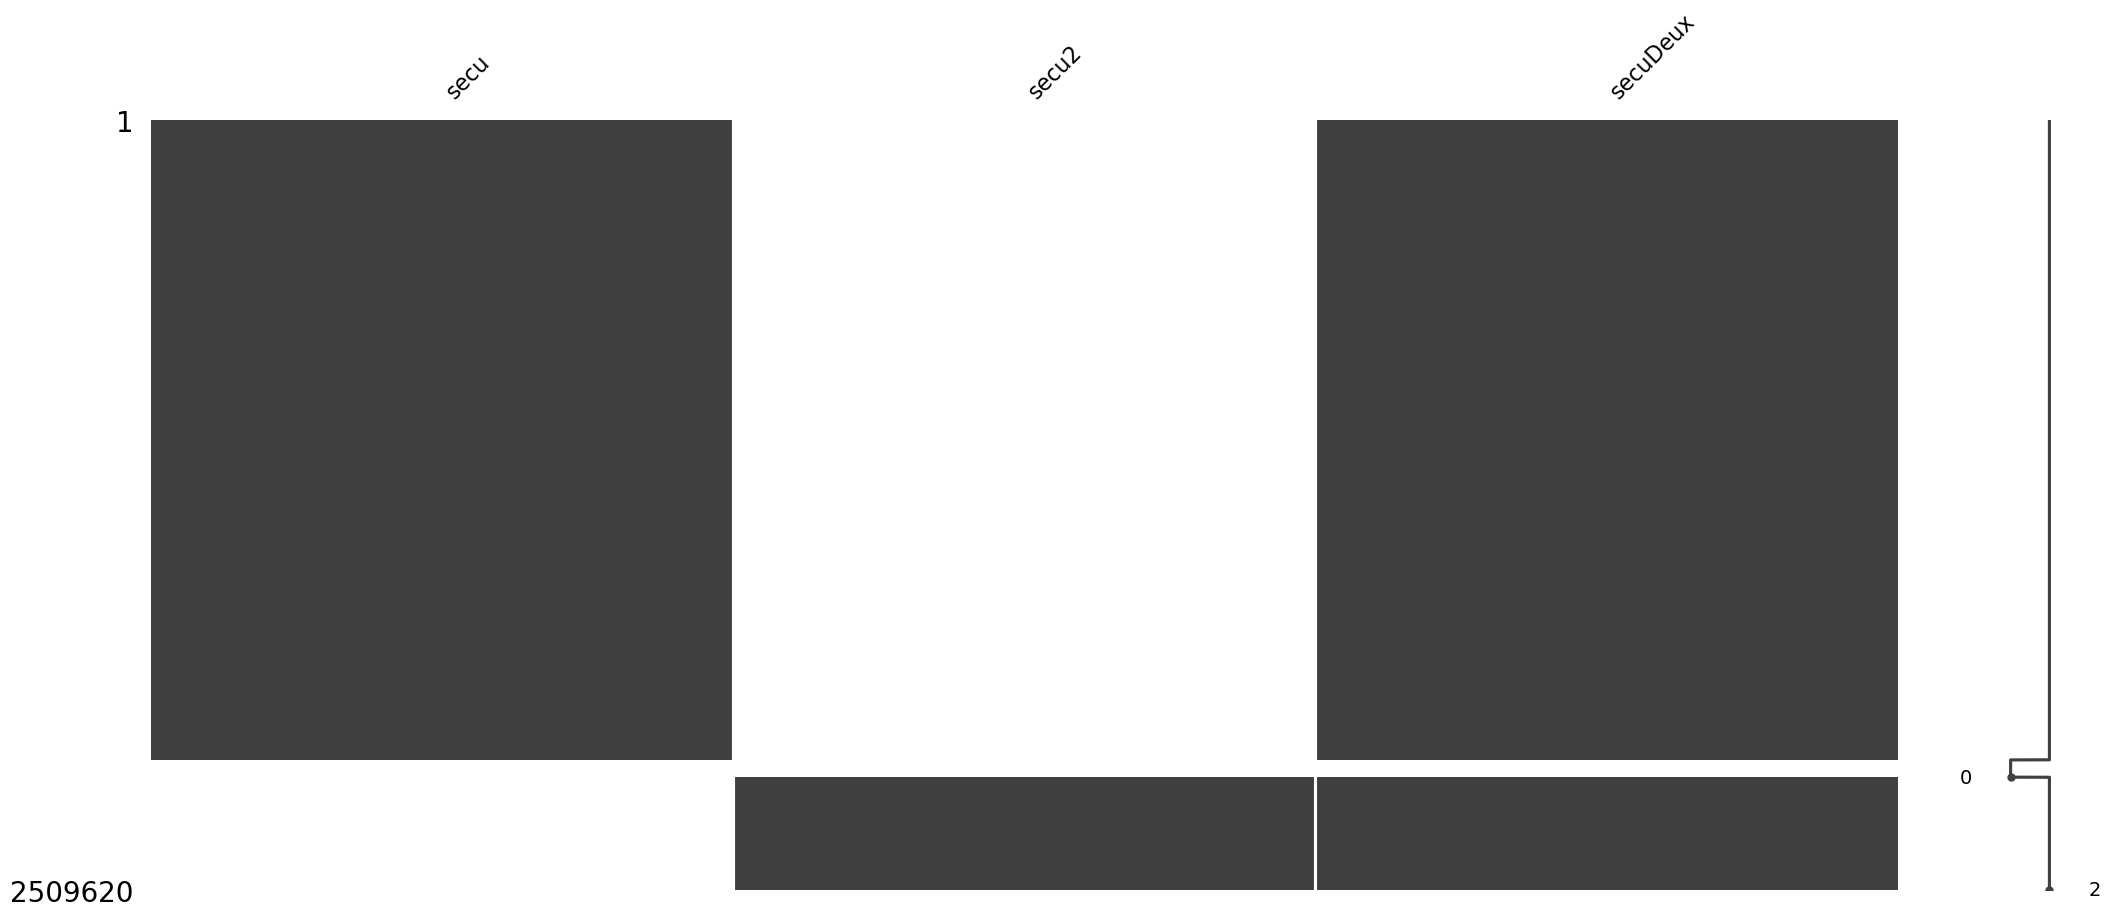

In [98]:
## Plot nullity matrix of lieux sorted by column 'secu' values
fig = msno.matrix(usag[['secu', 'secu2', 'secuDeux']].sort_values("secu"))

**secu3**

Le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité :
 - -1 – Non renseigné
 - 0 – Aucun équipement
 - 1 – Ceinture
 - 2 – Casque
 - 3 – Dispositif enfants
 - 4 – Gilet réfléchissant
 - 5 – Airbag (2RM/3RM)
 - 6 – Gants (2RM/3RM)
 - 7 – Gants + Airbag (2RM/3RM)
 - 8 – Non déterminable
 - 9 – Autre

In [99]:
# Liste des valeurs pour la colonne "secu3" :
unique_values = usag['secu3'].unique()
print(unique_values)

[nan -1.  0.  9.  2.  4.  6.  1.  8.  5.  3.  7.]


In [100]:
# Convert secu3 from float to category
usag.secu3 = usag.secu3.astype('category')
# Write an assert statement confirming the change
assert usag.secu3.dtype == 'category'

In [101]:
# Replace catagory number by category names
usag['secuTrois'] = usag.secu3.replace([-1, 0, 1, 2, 3, 4, 5, 6, 7 , 8, 9], 
                   ['Non renseigné', 'Aucun équipement', 'Ceinture', 'Casque', 'Dispositif enfants',
                   'Gilet réfléchissant', 'Airbag (2RM/3RM)', 'Gants (2RM/3RM)', 
                    'Gants + Airbag (2RM/3RM)', 'Non déterminable(8)', 'Autre'])

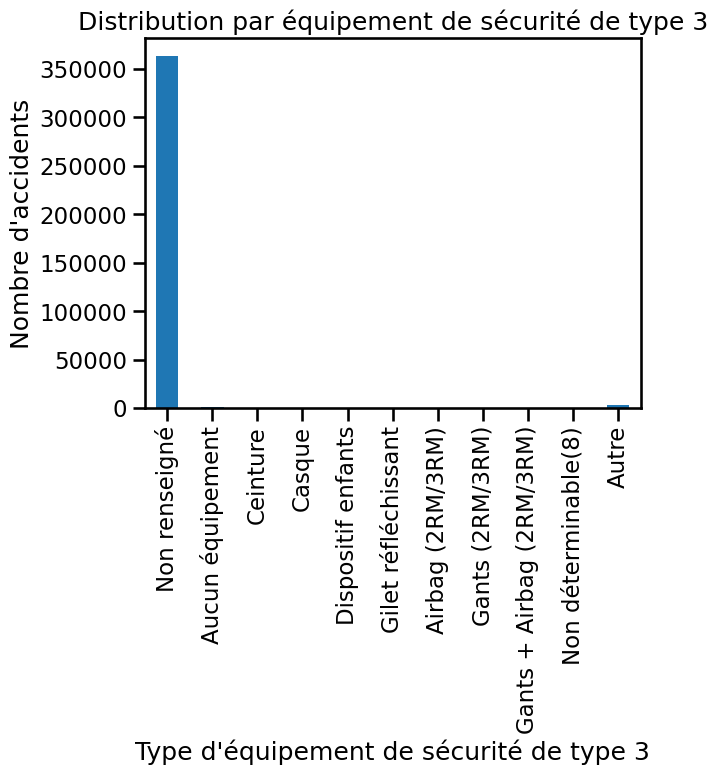

In [102]:
# Le nbre d'accidents par équipements de sécurité utilisés de type 3
counts = usag["secuTrois"].value_counts()

# Tri par équipement de sécurité de type 3
counts = counts.sort_index()

# Distribution des équipements de sécurité de type 3 sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution par équipement de sécurité de type 3")
plt.xlabel("Type d'équipement de sécurité de type 3")
plt.ylabel("Nombre d'accidents")

plt.show()

In [103]:
usag.value_counts("secuTrois", normalize=True).round(2)

secuTrois
Non renseigné               0.99
Autre                       0.01
Aucun équipement            0.00
Gants (2RM/3RM)             0.00
Non déterminable(8)         0.00
Gilet réfléchissant         0.00
Ceinture                    0.00
Airbag (2RM/3RM)            0.00
Gants + Airbag (2RM/3RM)    0.00
Casque                      0.00
Dispositif enfants          0.00
dtype: float64

**locp**

Localisation du piéton :
 - -1 – Non renseigné
 - 0 – Sans objet
 - Sur chaussée :
     - 1 – A + 50 m du passage piéton
     - 2 – A – 50 m du passage piéton
 - Sur passage piéton :
     - 3 – Sans signalisation lumineuse
     - 4 – Avec signalisation lumineuse
 - Divers :
     - 5 – Sur trottoir
     - 6 – Sur accotement
     - 7 – Sur refuge ou BAU
     - 8 – Sur contre allée
     - 9 – Inconnue

In [104]:
# Renvoie du type d'objets de la colonne locp
display(usag.locp.dtypes)
display(usag.locp.unique())

dtype('float64')

array([ 0.,  2.,  4.,  1.,  5.,  6.,  3.,  8.,  7., nan, -1.,  9.])

In [105]:
# Convert locp from float to category
usag.locp = usag.locp.astype('category')
# Write an assert statement confirming the change
assert usag.locp.dtype == 'category'

In [106]:
# Replace catagory number by category names
usag['locp'] = usag.locp.replace([-1, 0, 1, 2, 3, 4, 5, 6, 7 , 8, 9], 
                  ['Non renseigné', 'Sans objet', 'Sur chaussée-A + 50 m du passage piéton', 
                   'Sur chaussée-A – 50 m du passage piéton',  'Sur passage piéton-Sans signalisation lumineuse',
                  'Sur passage piéton-Avec signalisation lumineuse', 'Sur trottoir', 'Sur accotement',
                  'Sur refuge ou BA', 'Sur contre allée', 'Inconnue'])

In [107]:
usag.value_counts("locp")

locp
Sans objet                                         2096517
Non renseigné                                       165644
Sur chaussée-A – 50 m du passage piéton              48472
Sur passage piéton-Avec signalisation lumineuse      47935
Sur passage piéton-Sans signalisation lumineuse      43199
Sur chaussée-A + 50 m du passage piéton              29933
Sur trottoir                                         13321
Sur accotement                                        4402
Sur contre allée                                      2229
Inconnue                                              1367
Sur refuge ou BA                                       240
dtype: int64

In [108]:
usag.value_counts("locp", normalize=True)*100

locp
Sans objet                                         85.458445
Non renseigné                                       6.751998
Sur chaussée-A – 50 m du passage piéton             1.975821
Sur passage piéton-Avec signalisation lumineuse     1.953931
Sur passage piéton-Sans signalisation lumineuse     1.760882
Sur chaussée-A + 50 m du passage piéton             1.220132
Sur trottoir                                        0.542992
Sur accotement                                      0.179435
Sur contre allée                                    0.090859
Inconnue                                            0.055722
Sur refuge ou BA                                    0.009783
dtype: float64

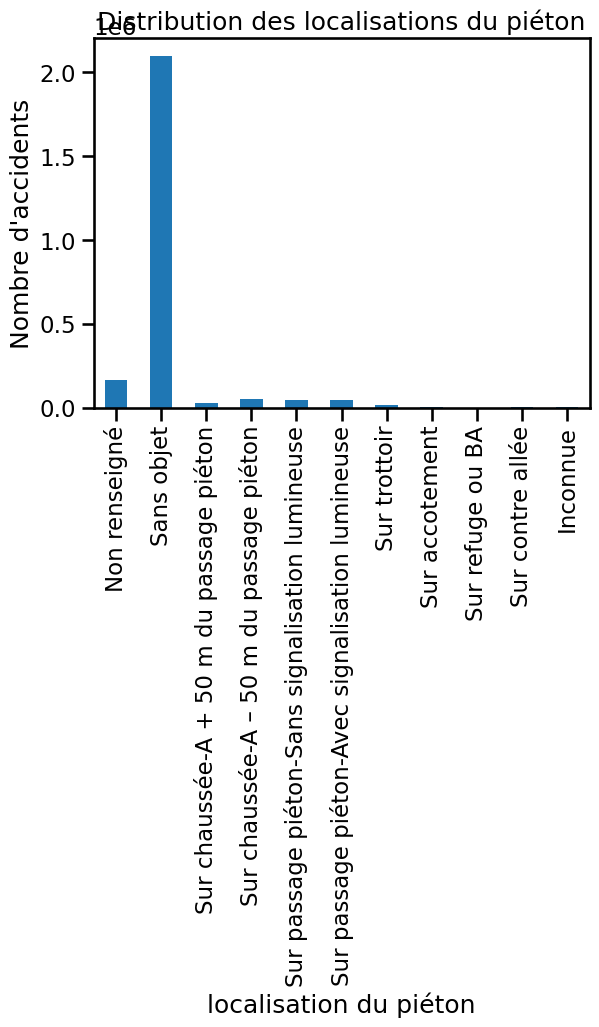

In [109]:
# Le nbre d'accidents par la localisation du piéton
counts = usag['locp'].value_counts()

# Tri par localisation du piéton
counts = counts.sort_index()

# Distribution des localisations du piéton sous forme de graphe
counts.plot(kind='bar')

plt.title('Distribution des localisations du piéton')
plt.xlabel('localisation du piéton')
plt.ylabel("Nombre d'accidents")

plt.show()

**etatp**

Cette variable permet de préciser si le piéton accidenté était seul ou non :
 - -1 – Non renseigné
 - 1 – Seul
 - 2 – Accompagné
 - 3 – En groupe

In [110]:
# Renvoie du type d'objets de la colonne etatp
display(usag.etatp.dtypes)
display(usag.etatp.unique())

dtype('float64')

array([ 0.,  2.,  1.,  3., nan, -1.])

In [111]:
# Convert etatp from float to category
usag.etatp = usag.etatp.astype('category')
# Write an assert statement confirming the change
assert usag.etatp.dtype == 'category'

In [112]:
# Replace catagory number by category names
usag['etatp']= usag.etatp.replace([-1, 0, 1, 2, 3], 
                   ['Non renseigné', 'Non renseigné', 'Seul', 'Accompagné', 'En groupe'])

In [113]:
usag.value_counts("etatp")

etatp
Non renseigné    2253797
Seul              151259
Accompagné         39595
En groupe           8551
dtype: int64

In [114]:
usag.value_counts("etatp", normalize=True).round(2)*100

etatp
Non renseigné    92.0
Seul              6.0
Accompagné        2.0
En groupe         0.0
dtype: float64

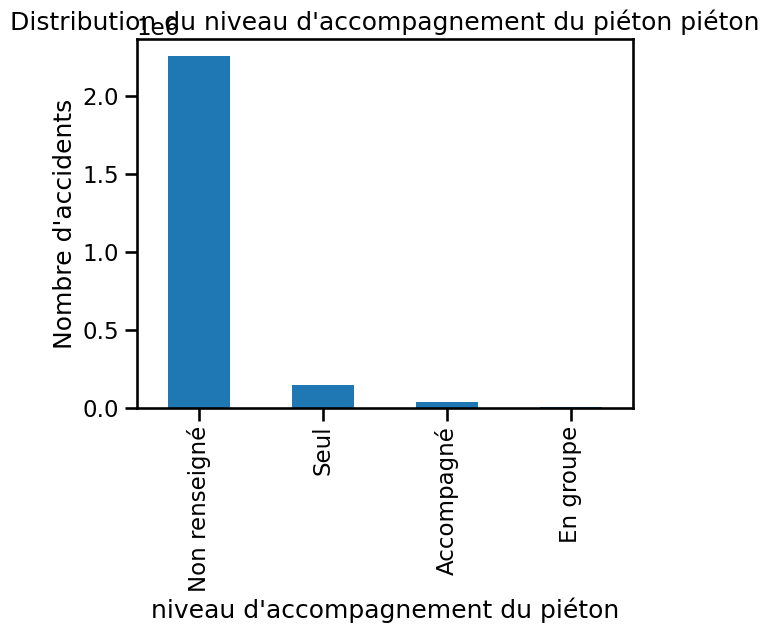

In [115]:
# Le nbre d'accidents en fonction du niveau d'accompagnement du piéton
counts = usag['etatp'].value_counts()

# Tri par niveau d'accompagnement du piéton
counts = counts.sort_index()

# Distribution du niveau d'accompagnement du piéton sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution du niveau d'accompagnement du piéton piéton")
plt.xlabel("niveau d'accompagnement du piéton")
plt.ylabel("Nombre d'accidents")

plt.show()

**actp**

Action du piéton :

 - -1 – Non renseigné
 - Se déplaçant
     - 0 – Non renseigné ou sans objet
     - 1 – Sens véhicule heurtant
     - 2 – Sens inverse du véhicule
 - Divers
     - 3 – Traversant
     - 4 – Masqué
     - 5 – Jouant – courant
     - 6 – Avec animal
     - 9 – Autre
     - A – Monte/descend du véhicule
     - B – Inconnue

In [116]:
# Renvoie du type d'objets de la colonne actp
display(usag.actp.dtypes)
display(usag.actp.unique())

dtype('O')

array(['0', '3', '1', '5', '2', '9', '6', '4', nan, ' -1', 'B', 'A', '8',
       '7'], dtype=object)

In [117]:
# Convert actp from float to category
usag.actp = usag.actp.astype('category')
# Write an assert statement confirming the change
assert usag.actp.dtype == 'category'

In [118]:
# Replace catagory number by category names
usag['actp'] = usag['actp'].replace([-1, 0, 1, 2, 3, 4, 5, 6, 7 , 8, 9], 
                  ['Non renseigné', 'Sans objet', 'Sens véhicule heurtant', 'Sens inverse du véhicule',  
                   'Traversant', 'Masqué', 'Jouant – courant', 'Avec animal', 'Autre', 'Monte/descend du véhicule',
                   'Inconnue'])

In [119]:
usag.value_counts("actp", normalize=True, dropna=False).round(2)*100

actp
0      86.0
3       6.0
 -1     6.0
9       1.0
1       0.0
5       0.0
2       0.0
4       0.0
B       0.0
6       0.0
A       0.0
8       0.0
7       0.0
dtype: float64

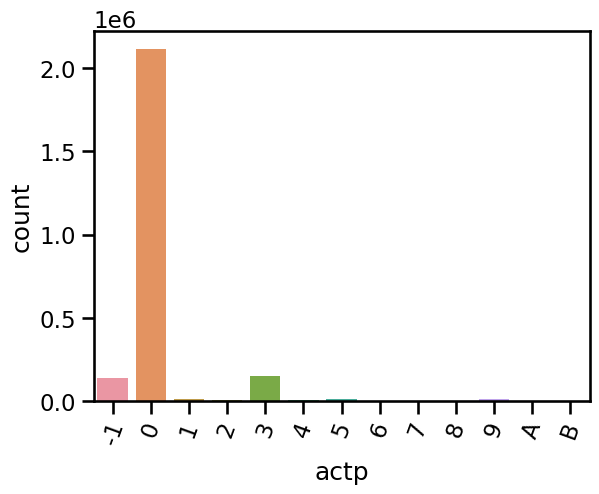

In [120]:
# Create count plot with vosp on the x-axis
sns.countplot(x='actp', data=usag)
plt.xticks(rotation=70)
# Show plot
plt.show()

**An_nais**

Année de naissance de l'usager.

In [121]:
# Renvoie du type d'objets de la colonne an_nais
display(usag.an_nais.dtypes)
display(usag.an_nais.unique())

dtype('float64')

array([1976., 1968., 1964., 2004., 1998., 1991., 1955., 1979., 1983.,
       1956., 1920., 1923., 1972., 1949., 1990., 1951., 1965., 1978.,
       1966., 1925., 1926., 1950., 1962., 1974., 1986., 1984., 1971.,
       1985., 1987., 1936., 1938., 1980., 1957., 1960., 1952., 1963.,
       1989., 1953., 1935., 1973., 1942., 1958., 1970., 1947., 1969.,
       1982., 1988., 1937., 1933., 1959., 1939., 1977., 1948., 1946.,
       1993., 1943., 1940., 1981., 1997., 1934., 1961., 1995., 1975.,
       1954., 1932., 2000., 1967., 1928., 1945., 1941., 1999., 2001.,
       1931., 1994., 1915., 1917., 1919., 1921., 1929., 2003., 1927.,
       1944., 1922., 1924.,   nan, 1916., 1930., 1992., 1918., 2002.,
       2005., 1996., 1914., 1913., 1901., 1909., 1912., 1898., 1911.,
       1906., 1910., 1900., 1905., 1902., 1897., 1907., 1896., 1908.,
       1903., 1904., 1899., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021.])

In [122]:
# converting the float to datetime format 
fmt = '%Y'
usag['an_nais'] = pd.to_datetime(usag['an_nais'], format=fmt)

In [123]:
type(usag['an_nais'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [124]:
# Create a datetime object d
usag['an_naiss'] = usag['an_nais'].dt.strftime(fmt)

In [125]:
 usag['an_nais'].value_counts(dropna=False, normalize=True)*100

1986-01-01    2.551024
1988-01-01    2.550585
1987-01-01    2.549191
1989-01-01    2.477626
1985-01-01    2.472805
                ...   
1897-01-01    0.000120
1899-01-01    0.000080
1902-01-01    0.000080
1904-01-01    0.000040
1896-01-01    0.000040
Name: an_nais, Length: 127, dtype: float64

In [126]:
usag.an_naiss.head()

0    1976
1    1968
2    1964
3    2004
4    1998
Name: an_naiss, dtype: object

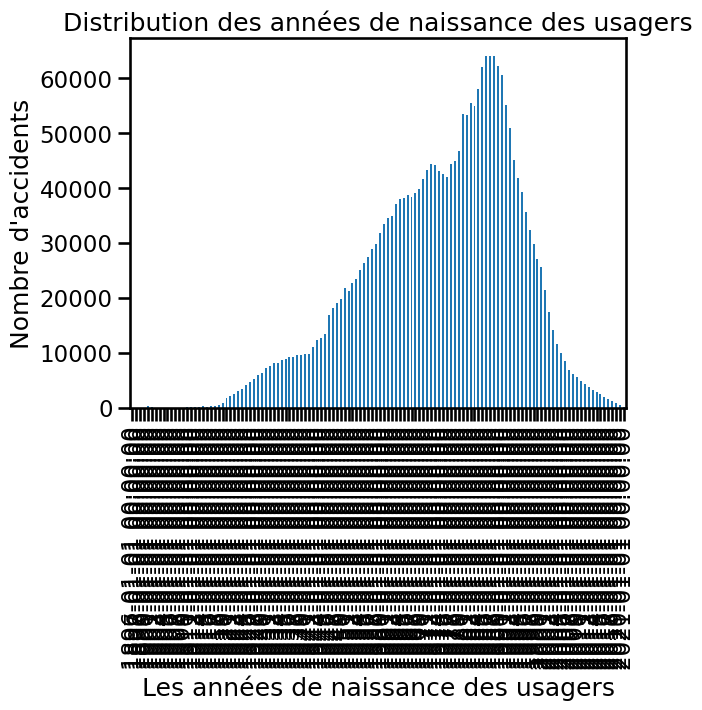

In [128]:
# Le nbre d'accidents en fonction de l'année de naissance de l'usager
counts = usag['an_nais'].value_counts()

# Tri par année de naissance de l'usager
counts = counts.sort_index()

# Distribution des années de naissance des usagers sous forme de graphe
counts.plot(kind='bar')

plt.title("Distribution des années de naissance des usagers")
plt.xlabel("Les années de naissance des usagers")
plt.ylabel("Nombre d'accidents")

plt.show()

In [129]:
counts = usag['an_naiss'].value_counts()
print(counts)

1986    64021
1988    64010
1987    63975
1989    62179
1985    62058
        ...  
1897        3
1899        2
1902        2
1904        1
1896        1
Name: an_naiss, Length: 126, dtype: int64


In [130]:
usag['annee'].dtypes

dtype('O')

In [131]:
usag['an_naiss'].dtypes

dtype('O')

In [132]:
usag['an_naiss'] = pd.to_datetime(usag['an_naiss'], format=fmt)

In [133]:
usag['an_naiss'][2]

Timestamp('1964-01-01 00:00:00')

In [134]:
usag['annee'] = pd.to_datetime(usag['annee'], format=fmt)

In [135]:
usag['annee'][2]

Timestamp('2005-01-01 00:00:00')

In [136]:
# Création d'une nouvelle colonne "age_acc" qui représenta l'âge d l'usager au moment de l'accident
usag['age_acc'] = usag['annee'] - usag['an_naiss']
usag['age_acc'].head()

0   10593 days
1   13515 days
2   14976 days
3     366 days
4    2557 days
Name: age_acc, dtype: timedelta64[ns]

In [137]:
usag['age_acc'].mean()

Timedelta('13740 days 08:00:32.582268672')

In [138]:
usag['age_acc'].median()

Timedelta('12419 days 00:00:00')

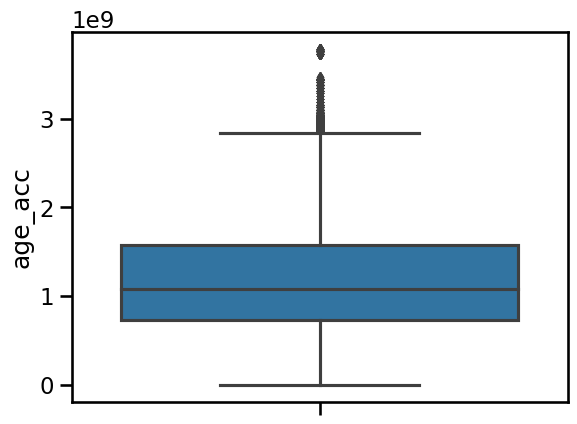

In [139]:
# By using the dt.total_seconds() method, we convert the timedelta values to numeric values 
# representing the total number of seconds in each duration
sns.boxplot(y=usag.age_acc.dt.total_seconds())
plt.show()

In [140]:
# Création d'une nouvelle colonne "age_accident" dans le dataframe "Usagers"
usag['age_acc_seconds'] = usag['age_acc'].dt.total_seconds()
usag['age_acc_seconds'].head()

0    9.152352e+08
1    1.167696e+09
2    1.293926e+09
3    3.162240e+07
4    2.209248e+08
Name: age_acc_seconds, dtype: float64

In [141]:
# Define the length of a year (in days)
days_per_year = 365

# Convert timedelta to years
years = usag['age_acc'] / pd.Timedelta(days=days_per_year)

# Print the resulting Series
print(years.head())

0    29.021918
1    37.027397
2    41.030137
3     1.002740
4     7.005479
Name: age_acc, dtype: float64


In [142]:
# age accident en années
usag['age_acc_an'] = usag['age_acc'] / pd.Timedelta(days=days_per_year)

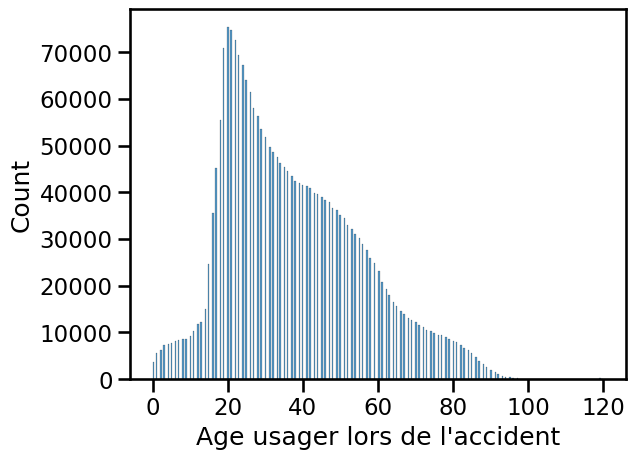

In [143]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag, x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age usager lors de l'accident")
# Show plot
plt.show();

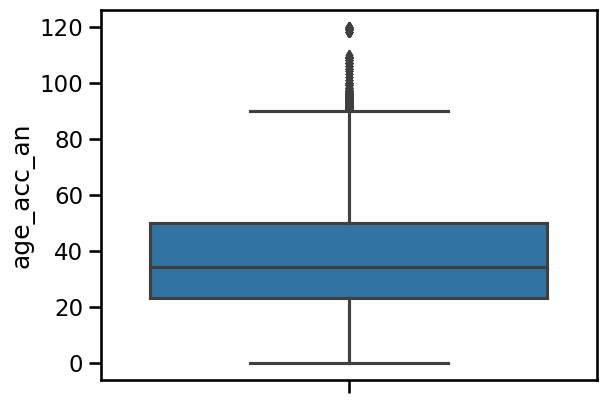

In [144]:
sns.boxplot(y=usag.age_acc_an)
plt.show()

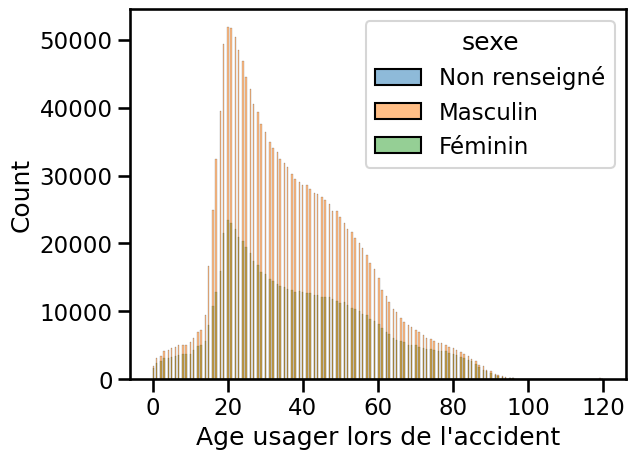

In [145]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag, x="age_acc_an", hue='sexe')
#plt.xlim(0, 10)
plt.xlabel("Age usager lors de l'accident")
# Show plot
plt.show();

In [146]:
# Le tableau croisé peut aider à identifier comment les observations se combinent.
# Cross-tabulate "Age de l'usager lors de l'accident" and "Sexe de l'usager"
pd.crosstab(usag['sexe'], usag['age_acc_an'], colnames=["Age de l'usager lors de l'accident"], 
            rownames=["Sexe de l'usager"])

Age de l'usager lors de l'accident,0.000000,1.000000,1.002740,2.000000,2.002740,3.000000,3.002740,4.002740,5.002740,5.005479,...,107.073973,108.071233,108.073973,109.071233,109.073973,109.076712,110.073973,118.079452,119.079452,120.079452
Sexe de l'usager,,,,,,,,,,,,,,,,,,,,,
Non renseigné,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Masculin,1964,2179,939,1656,1807,891,3300,4288,3209,1318,...,1,18,3,8,29,0,1,31,105,8
Féminin,1658,1693,748,1203,1505,645,2457,3120,2297,981,...,0,9,3,5,17,1,2,12,28,7


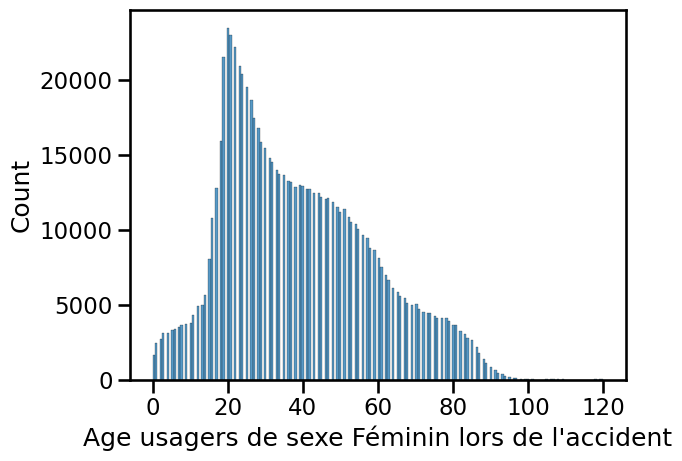

In [147]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag[usag['sexe'] == 'Féminin'], x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age usagers de sexe Féminin lors de l'accident")
# Show plot
plt.show();

In [148]:
usag[usag['sexe'] == 'Féminin']["age_acc_an"].max()

120.07945205479452

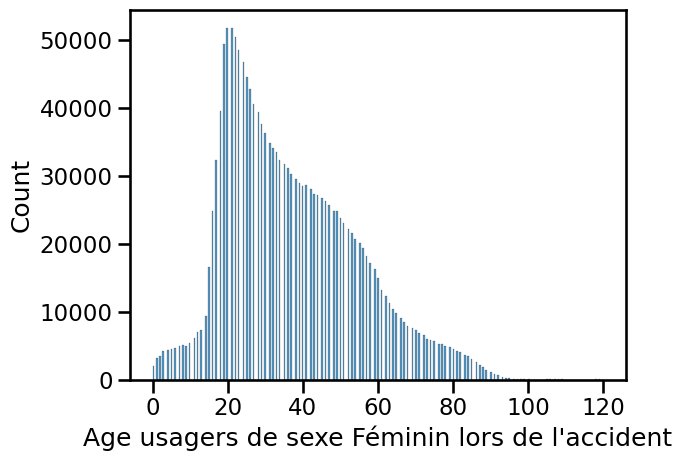

In [149]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag[usag['sexe'] == 'Masculin'], x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age usagers de sexe Féminin lors de l'accident")
# Show plot
plt.show();

In [150]:
usag[usag['sexe'] == 'Masculin']["age_acc_an"].max()

120.07945205479452

In [151]:
usag['an_naiss'].min()

Timestamp('1896-01-01 00:00:00')

In [152]:
usag['an_naiss'].max()

Timestamp('2021-01-01 00:00:00')

In [153]:
# Cross-tabulate "Age de l'usager lors de l'accident" and "Sexe de l'usager"
pd.crosstab(usag['sexe'], usag['catu'], colnames=["Catégorie Usager"], 
            rownames=["Sexe de l'usager"])

Catégorie Usager,Conducteur,Passager,Piéton,4
Sexe de l'usager,,,,
Non renseigné,3062,0,0,0
Masculin,1378338,207209,100512,2297
Féminin,485665,224686,106588,1263


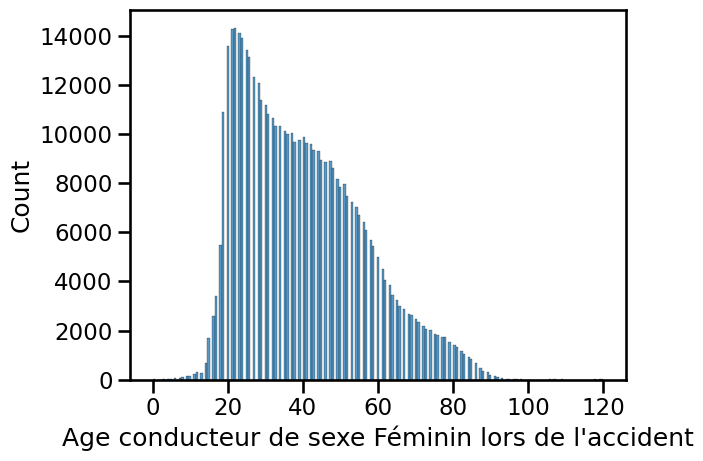

In [155]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag[(usag['sexe'] == 'Féminin') & (usag['catu'] == 'Conducteur')], x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age conducteur de sexe Féminin lors de l'accident")
# Show plot
plt.show();

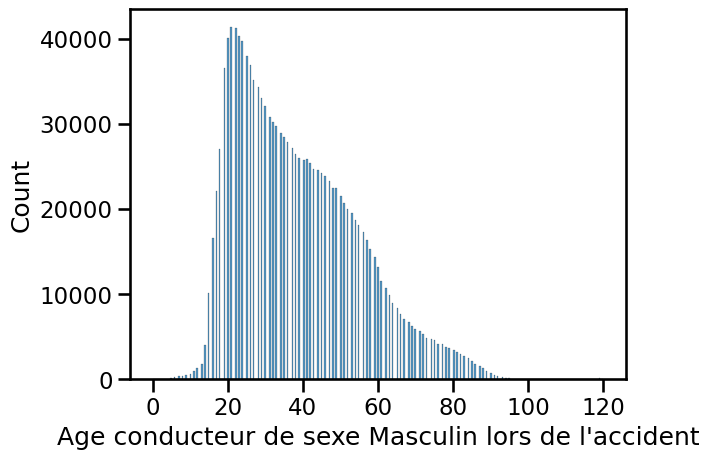

In [156]:
# Plot a histogram on age accident on the x-axis
sns.histplot(data=usag[(usag['sexe'] == 'Masculin') & (usag['catu'] == 'Conducteur')], x="age_acc_an")
#plt.xlim(0, 10)
plt.xlabel("Age conducteur de sexe Masculin lors de l'accident")
# Show plot
plt.show();

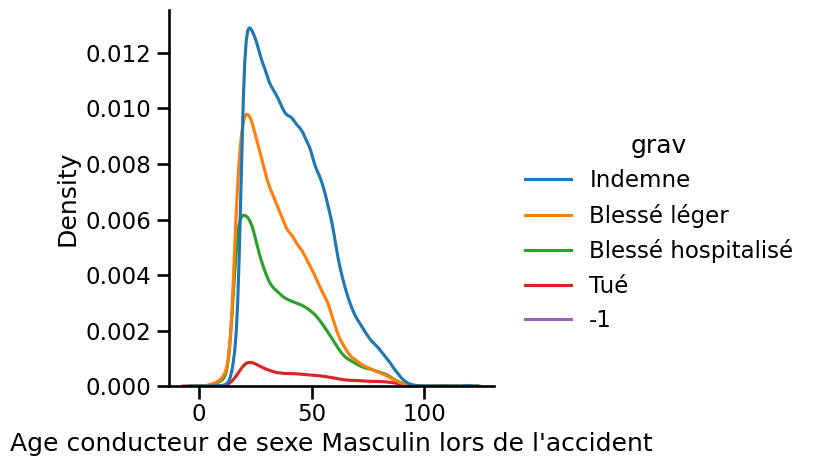

In [157]:
# Plot a histogram on age accident on the x-axis
sns.displot(data=usag[(usag['sexe'] == 'Masculin') & (usag['catu'] == 'Conducteur')], x="age_acc_an", 
             hue='grav', kind='kde')
#plt.xlim(0, 10)
plt.xlabel("Age conducteur de sexe Masculin lors de l'accident")
# Show plot
plt.show();

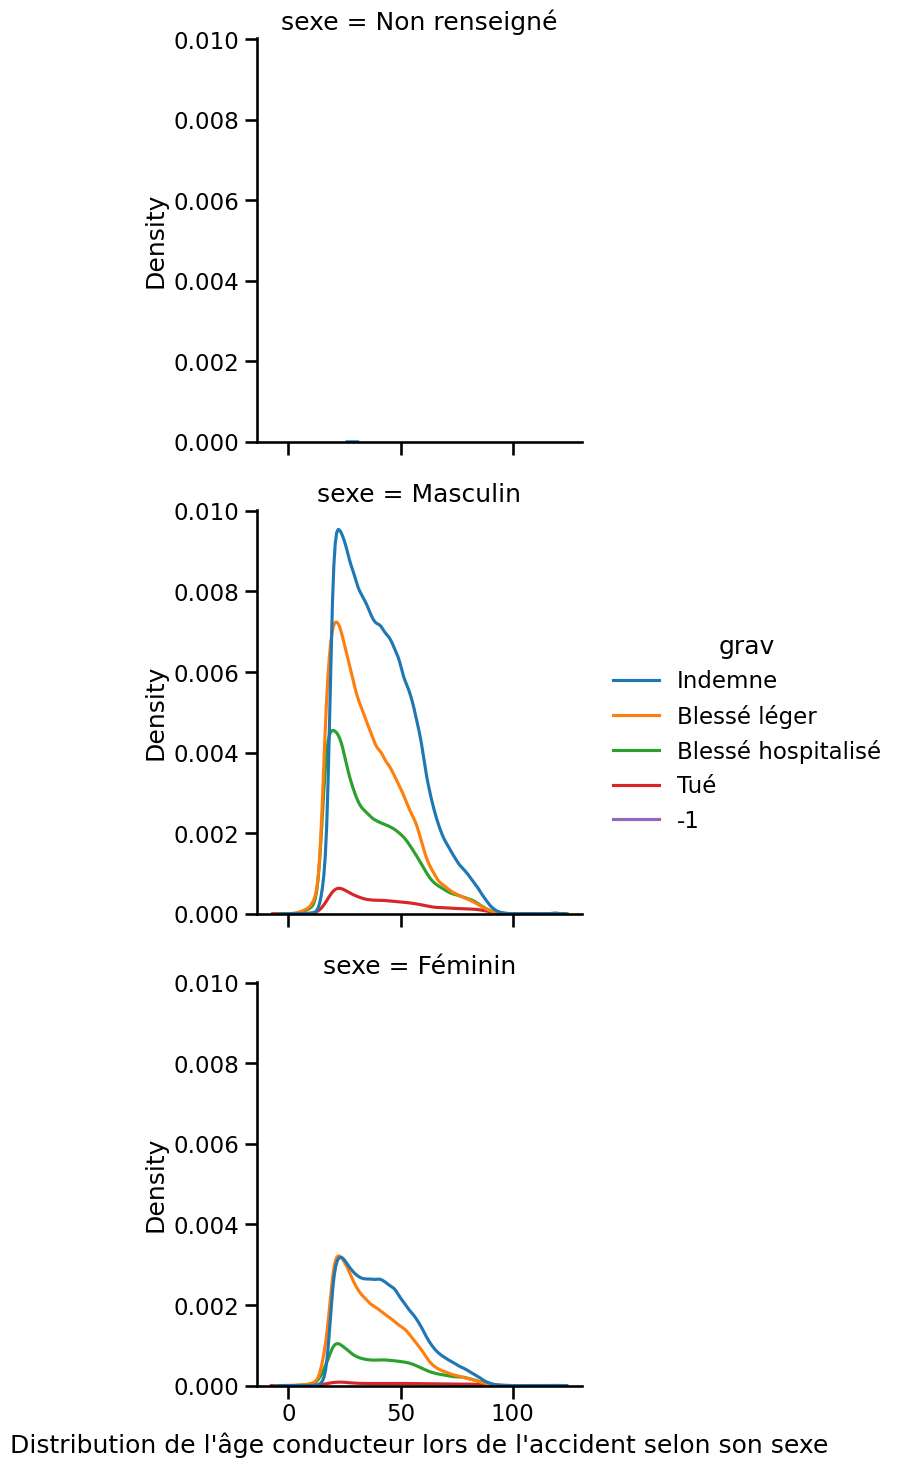

In [158]:
# Plot a histogram on age accident on the x-axis
sns.displot(data=usag[usag['catu'] == 'Conducteur'], x="age_acc_an", row='sexe',
             hue='grav', kind='kde')
#plt.xlim(0, 10)
plt.xlabel("Distribution de l'âge conducteur lors de l'accident selon son sexe")
# Show plot
plt.show();

In [159]:
usag.value_counts("age_acc_an", normalize=True, dropna=False).round(2)*100

age_acc_an
20.013699     3.0
24.016438     3.0
28.019178     2.0
19.013699     2.0
23.016438     2.0
             ... 
102.068493    0.0
110.073973    0.0
107.073973    0.0
109.076712    0.0
103.068493    0.0
Length: 197, dtype: float64

In [160]:
usag['age_acc_an'].describe()

count    2.504135e+06
mean     3.764475e+01
std      1.837574e+01
min      0.000000e+00
25%      2.301644e+01
50%      3.402466e+01
75%      5.003288e+01
max      1.200795e+02
Name: age_acc_an, dtype: float64

In [161]:
# gravite
usag.groupby('grav')['age_acc_an'].mean()

grav
Indemne               39.441871
Blessé léger          35.073611
Blessé hospitalisé    37.831349
Tué                   43.725480
-1                          NaN
Name: age_acc_an, dtype: float64

In [ ]:
# regroupement par la durée : moyenne d'age exprimée en mois


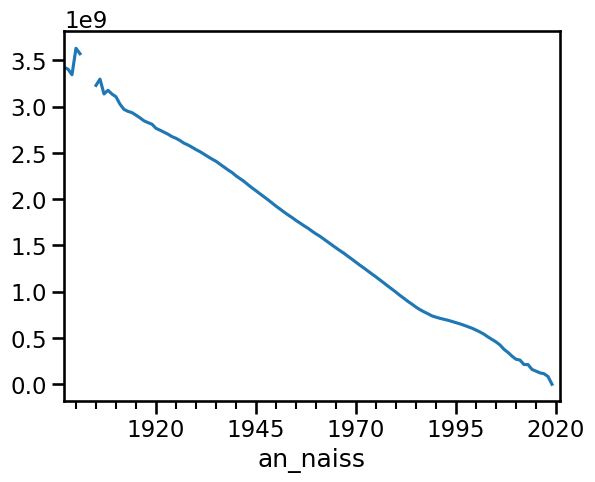

In [163]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample usag to daily, take the size, plot the results
usag[usag['catu'] == 'Conducteur'].resample('Y', on = 'an_naiss')['age_acc_seconds'].mean().plot()

# Show the results
plt.show()

In [164]:
print(pd.__version__)

1.4.4


In [170]:
usag.groupby('catu').size()

catu
Conducteur    1867065
Passager       431895
Piéton         207100
dtype: int64

In [171]:
usag.groupby('catu').first()

,Unnamed: 0,num_acc,place,grav,sexe,trajet,secu,locp,actp,etatp,...,secu1,secu2,secu3,secuUn,secuDeux,secuTrois,an_naiss,age_acc,age_acc_seconds,age_acc_an
catu,,,,,,,,,,,,,,,,,,,,,
Conducteur,1,2.005000e+11,1.0,Blessé léger,Masculin,Domicile – travail,11.0,Sans objet,0,Non renseigné,...,1.0,0.0,-1.0,Ceinture,Ceinture,Non renseigné,1976-01-01,10593 days,9.152352e+08,29.021918
Passager,3,2.005000e+11,2.0,Indemne,Masculin,Non renseigné,11.0,Sans objet,0,Non renseigné,...,1.0,0.0,-1.0,Ceinture,Ceinture,Non renseigné,1964-01-01,14976 days,1.293926e+09,41.030137
Piéton,25,2.005000e+11,0.0,Blessé hospitalisé,Masculin,Promenade – loisirs,0.0,Sur chaussée-A – 50 m du passage piéton,3,Accompagné,...,8.0,0.0,-1.0,Aucun équipement,Non renseigné,Non renseigné,1962-01-01,15706 days,1.356998e+09,43.030137


In [172]:
top_15_years = counts.head(15)
print(top_15_years)

Conducteur    1867065
Passager       431895
Piéton         207100
Name: catu, dtype: int64


In [173]:
# Count the number of missing values in each column
print(usag.isna().sum())

Unnamed: 0               0
num_acc                  0
place               123128
catu                  3560
grav                     0
sexe                     0
trajet                 494
secu                423962
locp                 56361
actp                 56462
etatp                56418
an_nais               5485
num_veh                  0
annee                    0
id_vehicule        2142195
secu1              2142195
secu2              2142195
secu3              2142195
secuUn               56537
secuDeux             56537
secuTrois          2142195
an_naiss              5485
age_acc               5485
age_acc_seconds       5485
age_acc_an            5485
dtype: int64


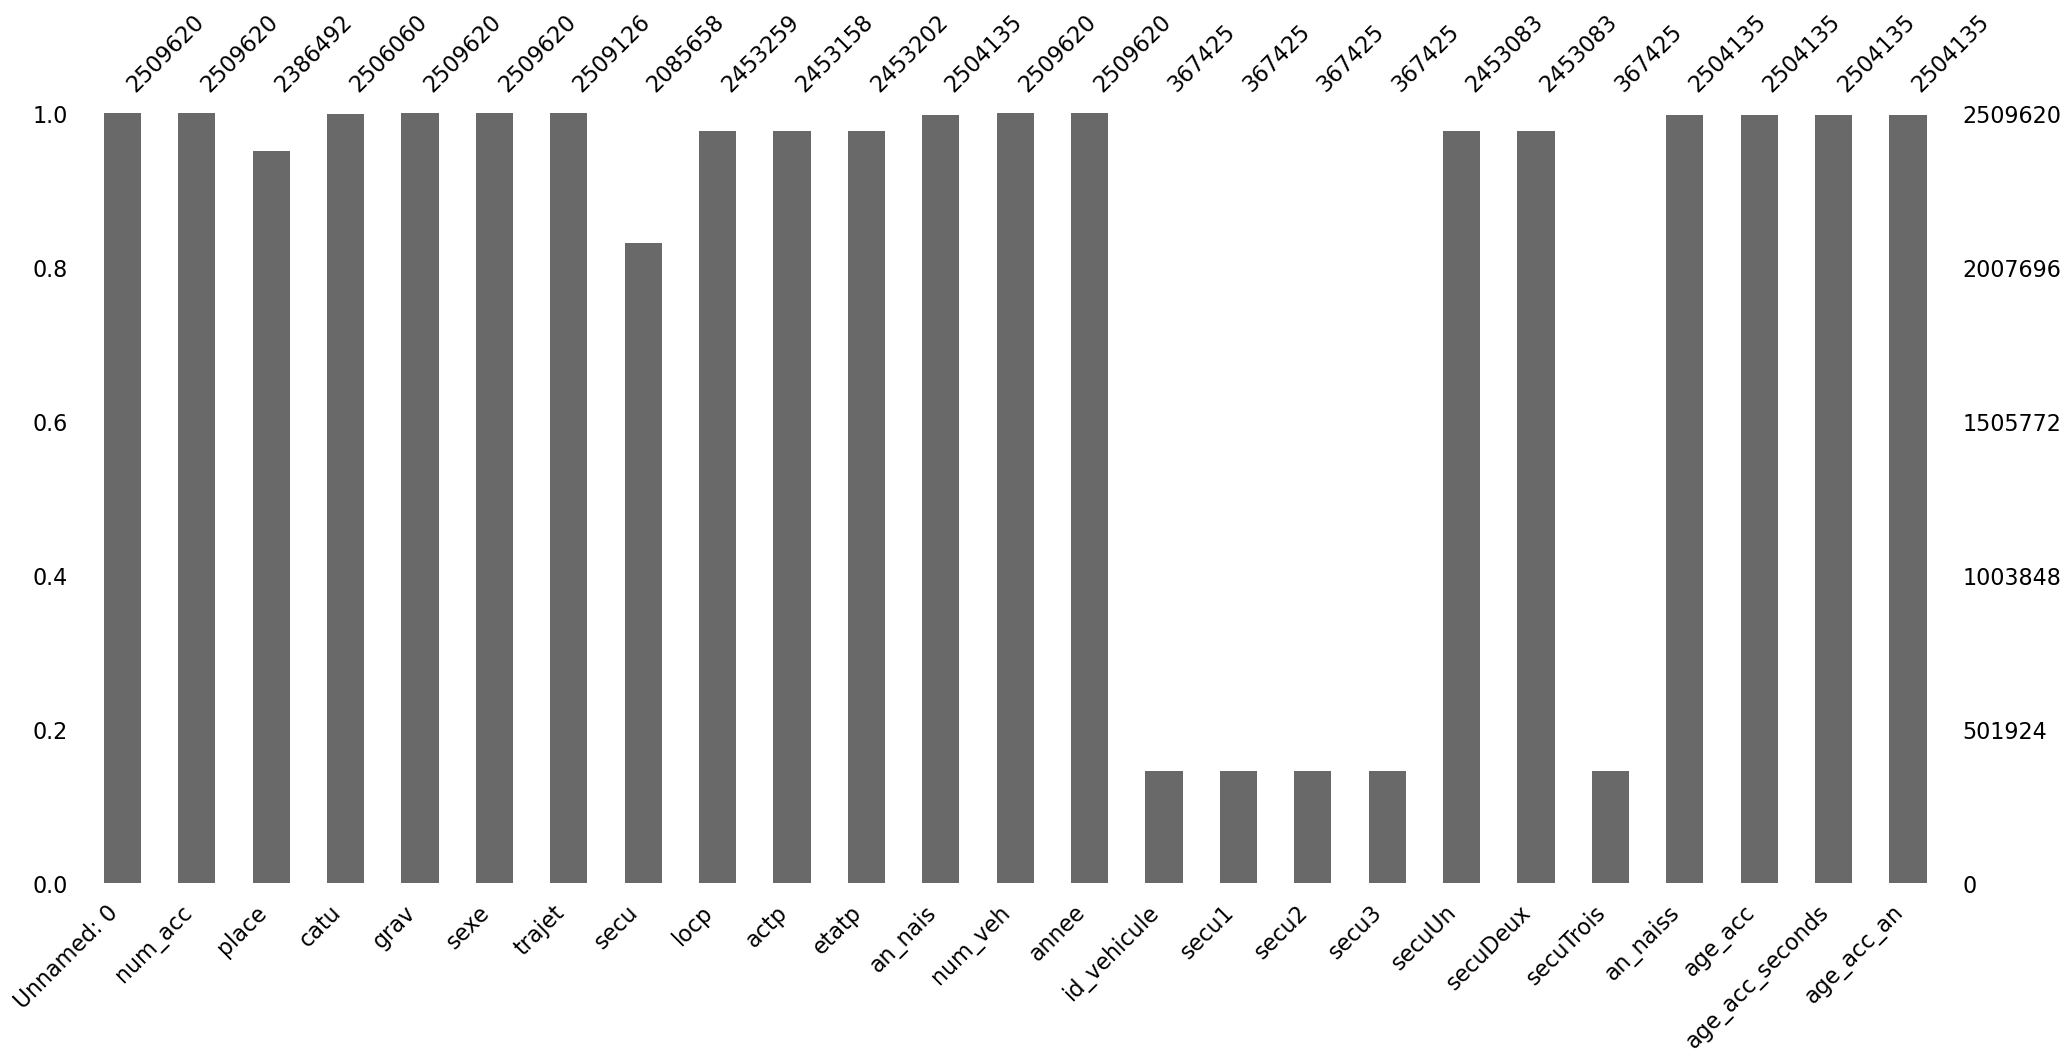

In [174]:
msno.bar(usag);

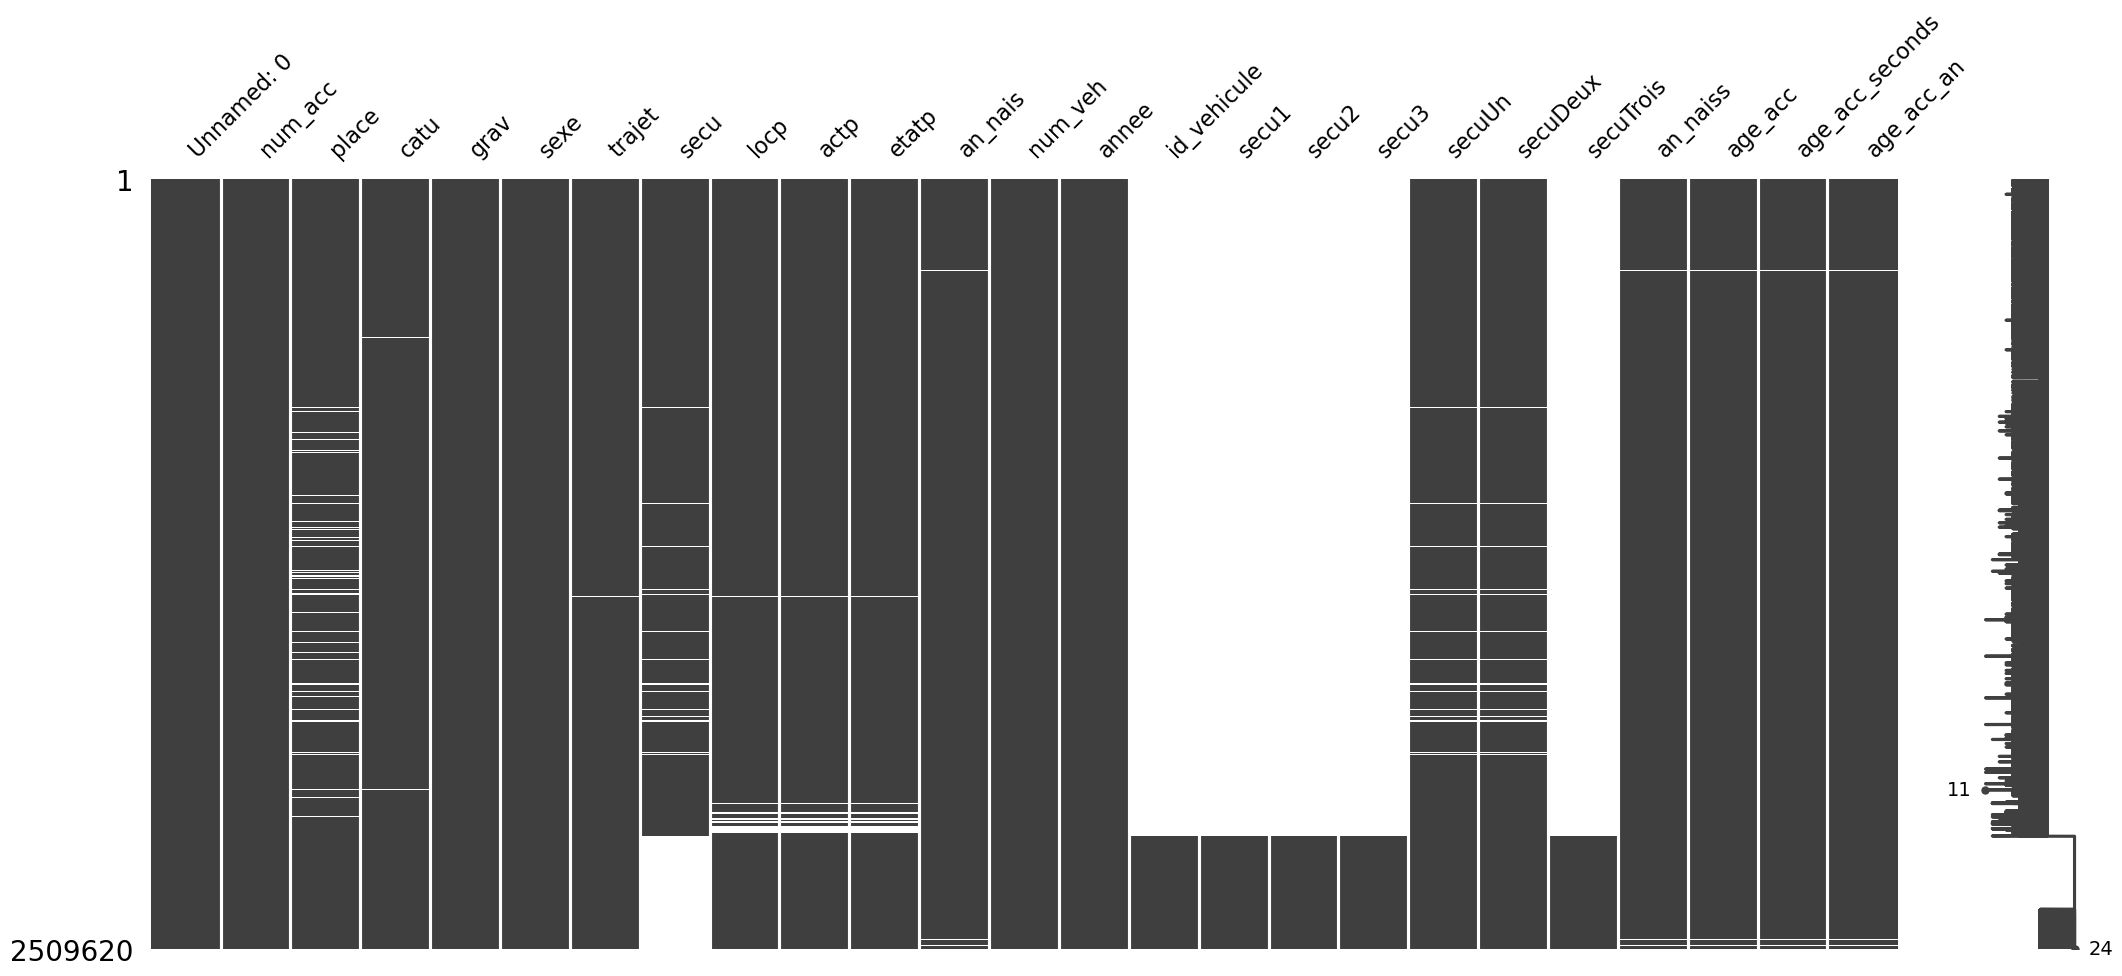

In [175]:
## Plot nullity matrix of usages
fig = msno.matrix(usag)

##### Colonnes à supprimer 
 - secu1 : reporté dans secuUn
 - secu2 : reporté dans secuDeux
 - secu3 : non renseigné à 99%
 - secu : transféré vers secuUn et secuDeux
 - 'Unnamed: 0'
 

In [177]:
usag.columns

Index(['Unnamed: 0', 'num_acc', 'place', 'catu', 'grav', 'sexe', 'trajet',
       'secu', 'locp', 'actp', 'etatp', 'an_nais', 'num_veh', 'annee',
       'id_vehicule', 'secu1', 'secu2', 'secu3', 'secuUn', 'secuDeux',
       'secuTrois', 'an_naiss', 'age_acc', 'age_acc_seconds', 'age_acc_an'],
      dtype='object')

In [178]:
# Suppression des colonnes ayant peu d'intérêts de notre point de vue : 
usag.drop(columns=['Unnamed: 0', "secu1", "secu2", 'secu3', 'secu'], inplace=True)
usag.columns

Index(['num_acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'locp', 'actp',
       'etatp', 'an_nais', 'num_veh', 'annee', 'id_vehicule', 'secuUn',
       'secuDeux', 'secuTrois', 'an_naiss', 'age_acc', 'age_acc_seconds',
       'age_acc_an'],
      dtype='object')

##### Données non représentatives 
 - locp : avec 85% de valeurs rempli par la valeur 0, soit "sans objet"
 - etatp : non renseigné à 92%
 - actp : non renseigné cumulé à 92%
 - secu3 : non renseigné à 99%
 - secu : transféré vers secuUn et secuDeux
 

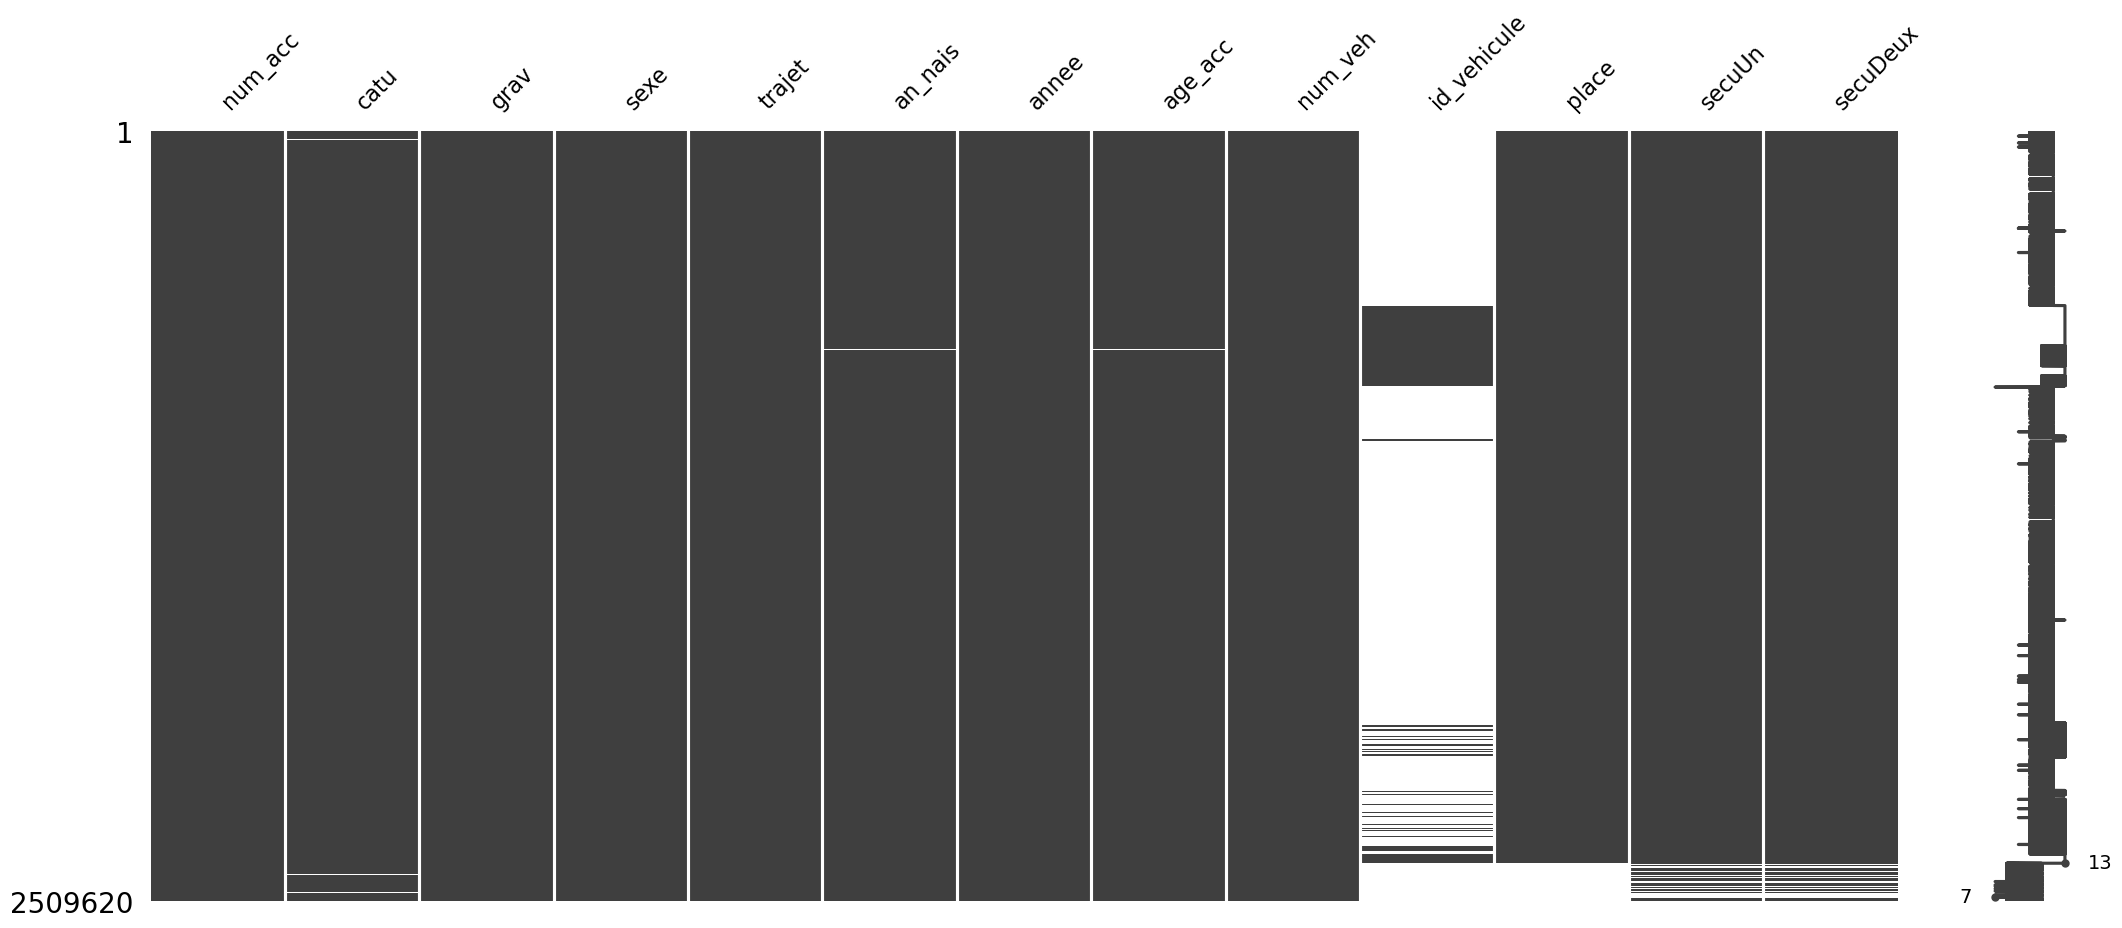

In [179]:
## Plot nullity matrix of lieux
fig = msno.matrix(usag[['num_acc', 'catu', 'grav', 'sexe', 'trajet',
       'an_nais', 'annee', 'age_acc', 'num_veh', 'id_vehicule', 'place', 'secuUn', 'secuDeux']].sort_values("place"))

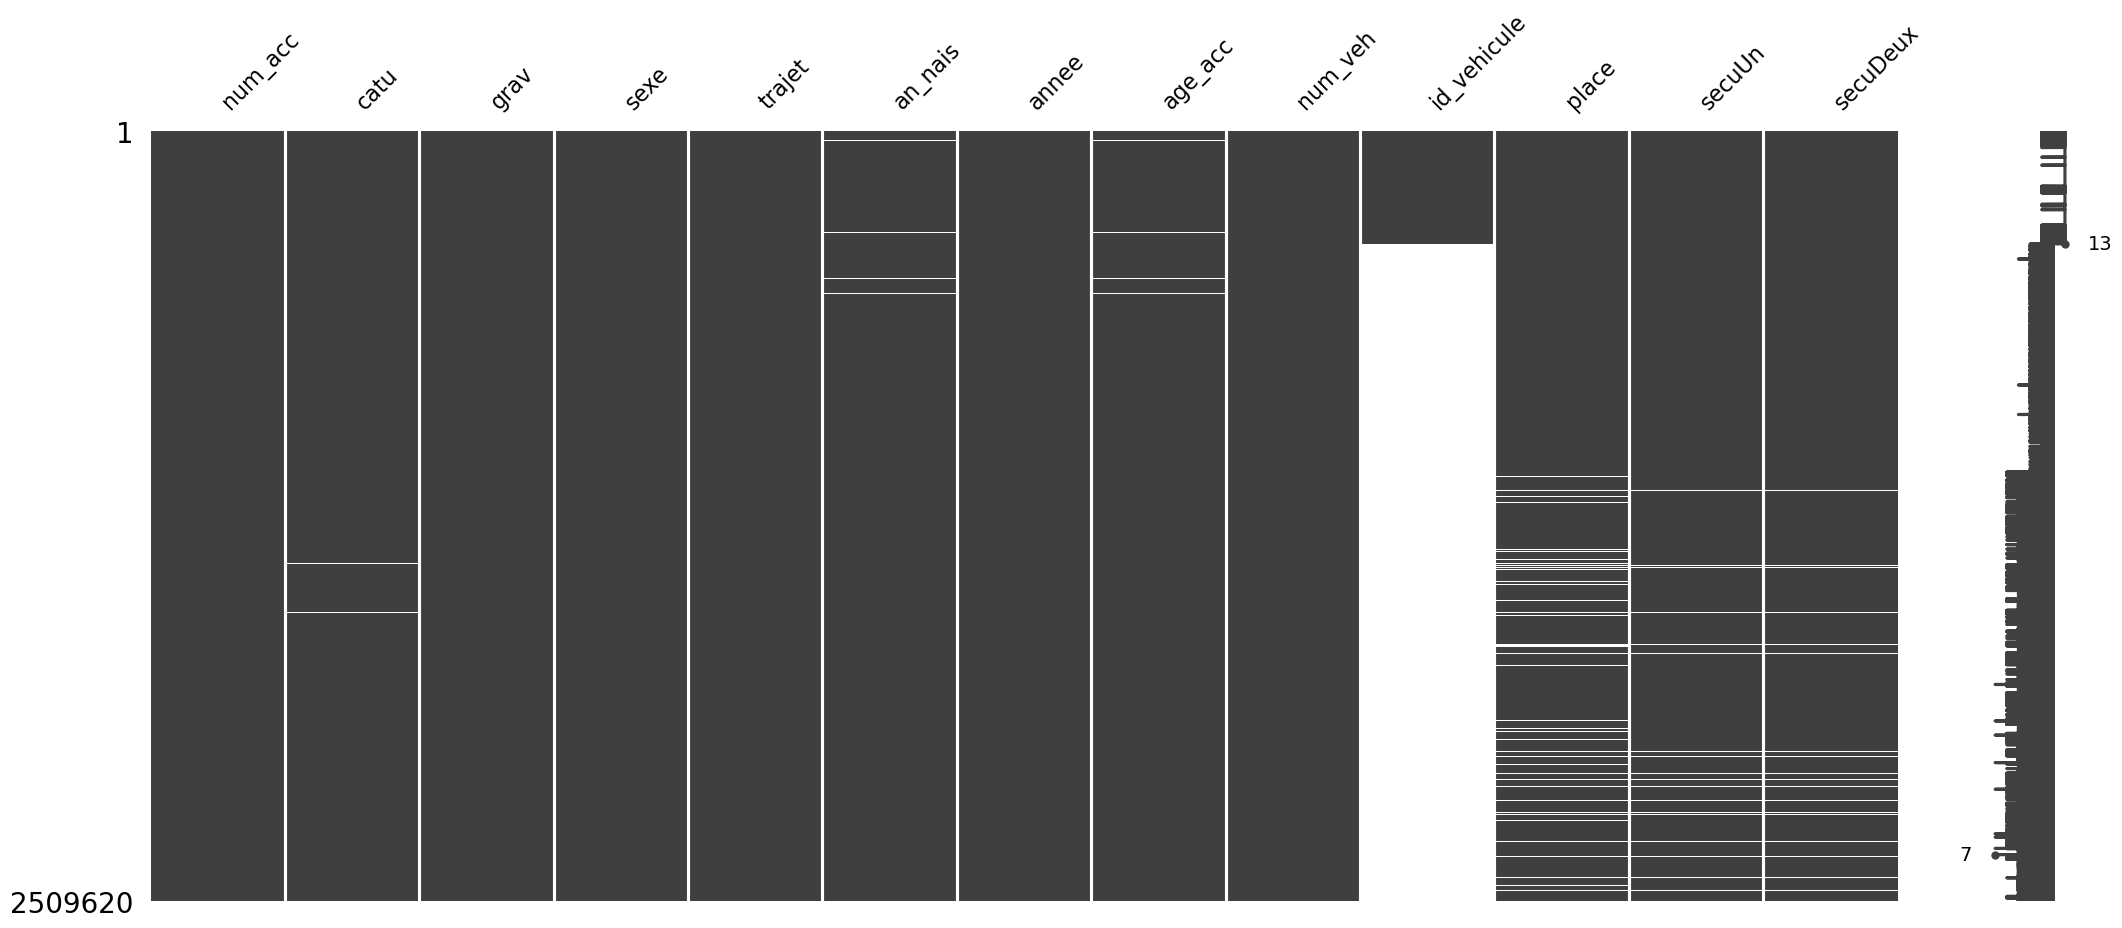

In [180]:
## Plot nullity matrix of lieux
fig = msno.matrix(usag[['num_acc', 'catu', 'grav', 'sexe', 'trajet',
       'an_nais', 'annee', 'age_acc', 'num_veh', 'id_vehicule', 'place', 'secuUn', 'secuDeux']].sort_values("id_vehicule"))

#sns.scatterplot(data=usag.sort_values('annee'), x='annee', y='id_vehicule')
#plt.xticks(rotation=90);

In [186]:
# Le tableau croisé peut aider à identifier comment les observations se combinent.
pd.crosstab(usag['annee'], usag['id_vehicule'], rownames=["Année de l'accident"], colnames=["ID véhicule"])

ID véhicule,100 882,100 883,100 884,100 885,100 886,100 887,100 888,100 889,100 890,100 891,...,201 753,201 754,201 755,201 758,201 759,201 761,201 762,201 763,201 764,201 765
Année de l'accident,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1


In [187]:
usag.groupby('annee')['id_vehicule'].count()

annee
2005-01-01         0
2006-01-01         0
2007-01-01         0
2008-01-01         0
2009-01-01         0
2010-01-01         0
2011-01-01         0
2012-01-01         0
2013-01-01         0
2014-01-01         0
2015-01-01         0
2016-01-01         0
2017-01-01         0
2018-01-01         0
2019-01-01    132977
2020-01-01    105295
2021-01-01    129153
Name: id_vehicule, dtype: int64

In [204]:
# Suppression des colonnes ayant peu d'intérêts de notre point de vue : 
#usag.drop(columns=['id_vehicule'], inplace=True)
#usag.columns

Index(['Unnamed: 0', 'num_acc', 'place', 'catu', 'grav', 'sexe', 'trajet',
       'an_nais', 'num_veh', 'annee', 'secu1', 'secu2', 'catuLabel',
       'gravLabel', 'sexeLabel', 'trajetLabel', 'locpLabel', 'etatpLabel',
       'an_naiss', 'age_acc', 'age_acc_seconds', 'secuUn', 'secuDeux',
       'secuUnLabel', 'secuDeuxLabel', 'secu3Label'],
      dtype='object')

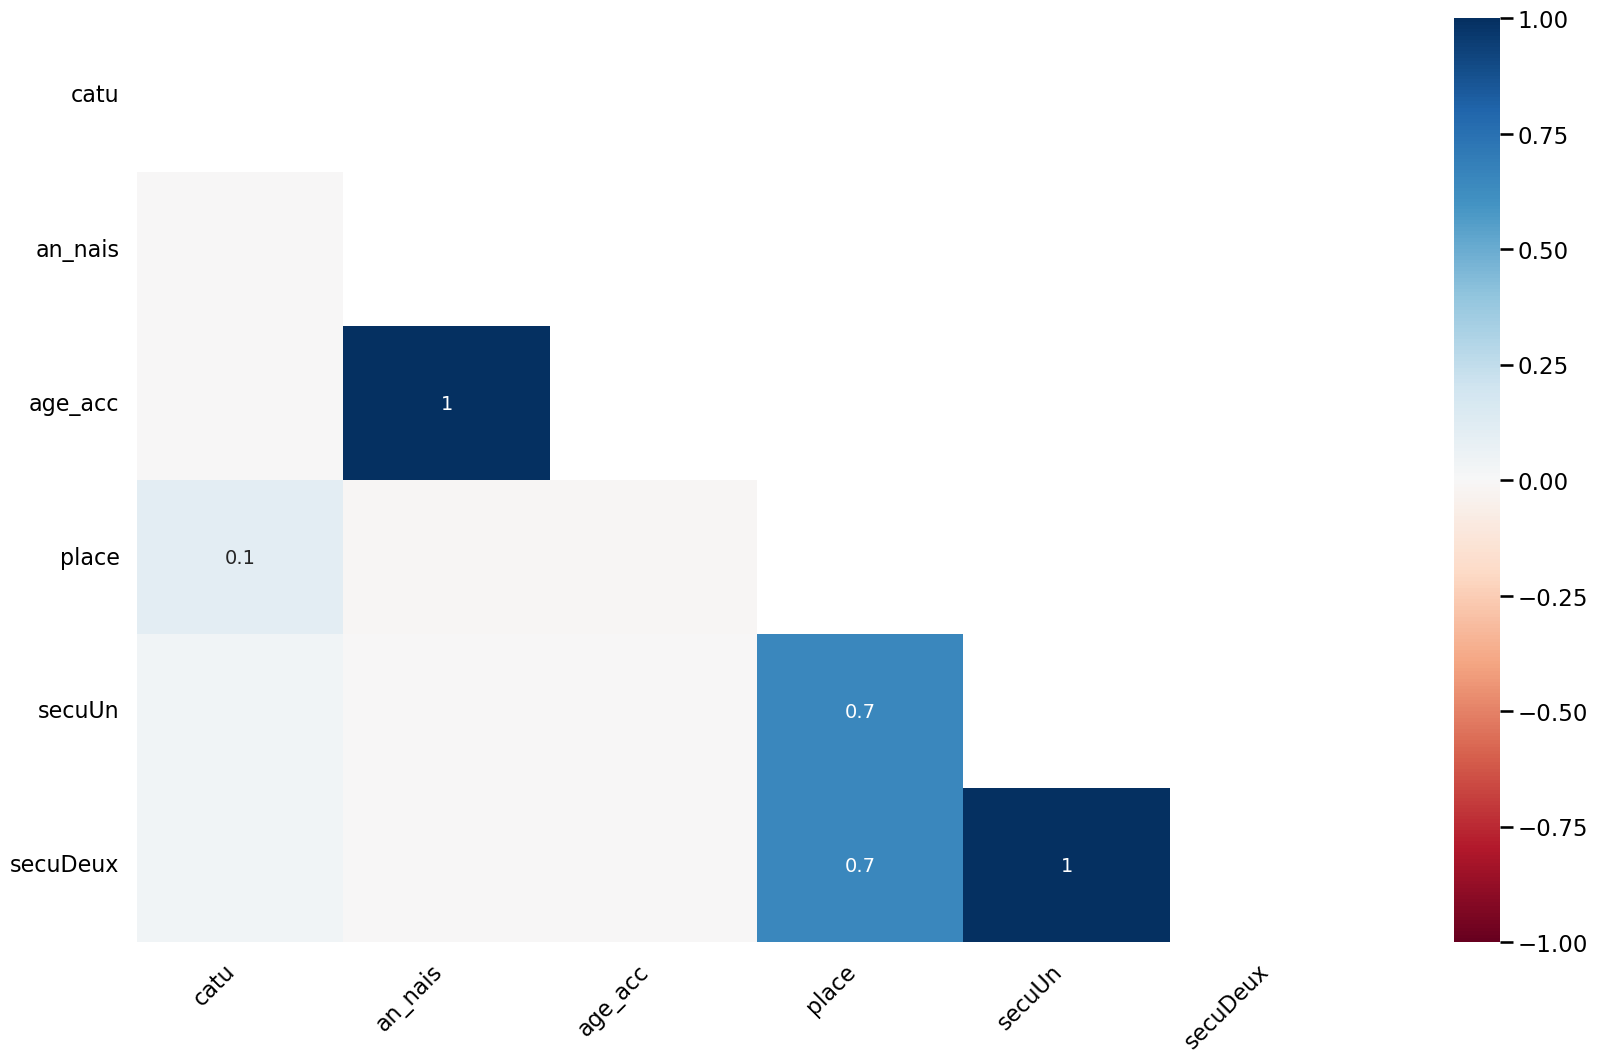

In [189]:
# Finding correlations in your data
# Une heatmap de corrélations entre toutes les variables du DataFrame permet de repérer les variables importantes 
#   et celles colinéaires entre elles.
# Plot missingness heatmap of usag
msno.heatmap(usag[['catu', 'an_nais', 'annee', 'age_acc', 'num_veh', 'place', 'secuUn', 'secuDeux']]);

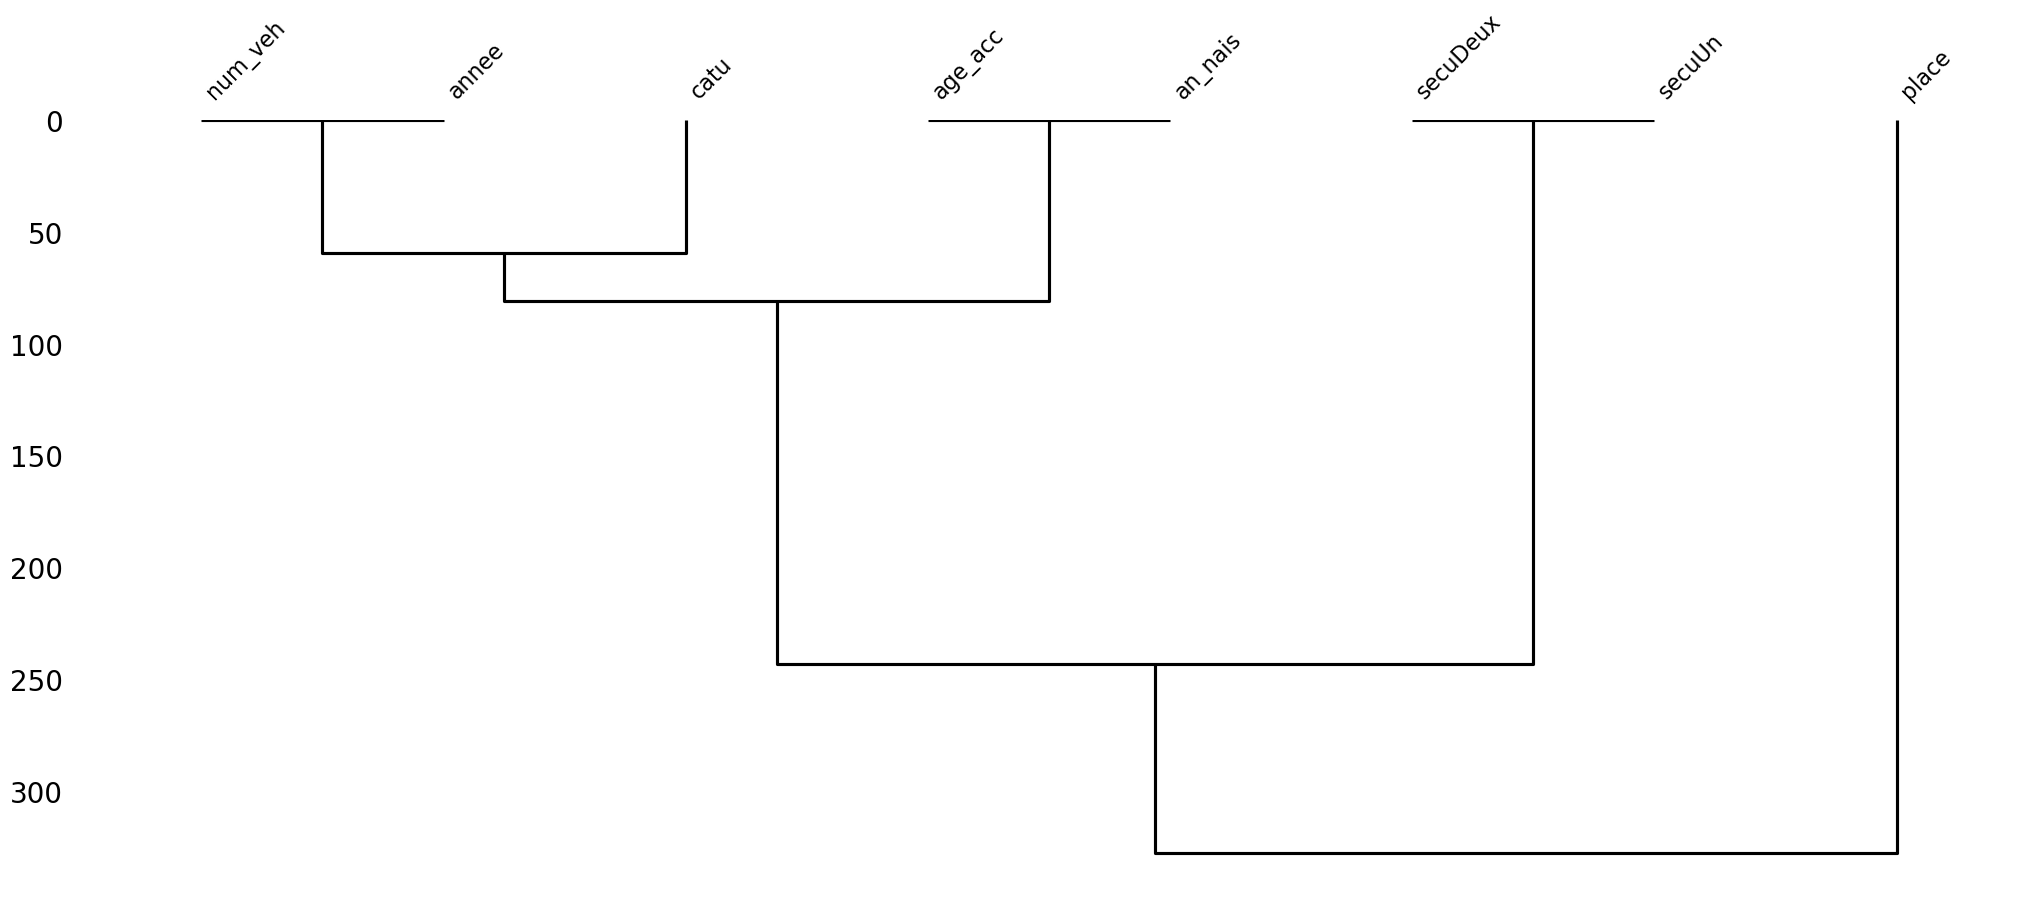

In [190]:
# dendrogramme
# Plot missingness dendrogram of usag
msno.dendrogram(usag[['catu', 'an_nais', 'annee', 'age_acc', 'num_veh', 'place', 'secuUn', 'secuDeux']]);

In [191]:
usag.dtypes

num_acc                    float64
place                     category
catu                      category
grav                      category
sexe                      category
trajet                    category
locp                      category
actp                      category
etatp                     category
an_nais             datetime64[ns]
num_veh                     object
annee               datetime64[ns]
id_vehicule                 object
secuUn                    category
secuDeux                  category
secuTrois                 category
an_naiss            datetime64[ns]
age_acc            timedelta64[ns]
age_acc_seconds            float64
age_acc_an                 float64
dtype: object

In [192]:
# Export DataFrame to csv
usag.to_csv("usag5.csv")

In [193]:
# Group the adult dataset by "Sexe" and "gravité"
gb = usag.groupby(by=["sexe", "grav"])

# Print out how many rows are in each created group
print(gb.size())

# Print out the mean of each group for all columns
print(gb.mean())

sexe           grav              
Non renseigné  Indemne                 3002
               Blessé léger               0
               Blessé hospitalisé         0
               Tué                        0
               -1                        60
Masculin       Indemne               736390
               Blessé léger          556984
               Blessé hospitalisé    343654
               Tué                    51328
               -1                         0
Féminin        Indemne               289689
               Blessé léger          354868
               Blessé hospitalisé    157895
               Tué                    15750
               -1                         0
dtype: int64
                                       num_acc  age_acc_seconds  age_acc_an
sexe          grav                                                         
Non renseigné Indemne             2.021000e+11     8.994240e+08   28.520548
              Blessé léger                 NaN              NaN  